# Import Python Library and Algorithms

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data_for_preproc'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import string
from nltk.util import ngrams
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression


In [3]:
import re

In [4]:
RANDOM_SEED = 42 
VAL_SIZE   = 0.2 # train = 0.8

# Import Data

In [5]:
train = pd.read_csv('train_24_02_2021.csv') #new parse data from auto.ru
# train = pd.read_csv('train_02_03_2021.csv') #new parse data from auto.ru


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
train = pd.read_csv('train_02_03_2021.csv') #new parse data from auto.ru


In [7]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

In [8]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60142 entries, 0 to 60141
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              60142 non-null  object 
 1   brand                 60142 non-null  object 
 2   description           58860 non-null  object 
 3   engineDisplacement    60142 non-null  int64  
 4   enginePower           60142 non-null  int64  
 5   equipment_dict        50683 non-null  object 
 6   fuelType              60142 non-null  object 
 7   image                 60142 non-null  object 
 8   mileage               60142 non-null  int64  
 9   modelDate             60142 non-null  int64  
 10  model_info            60142 non-null  object 
 11  model_name            60142 non-null  object 
 12  name                  60142 non-null  object 
 13  numberOfDoors         60142 non-null  int64  
 14  parsing_unixtime      60142 non-null  float64
 15  priceCurrency      

(None, None)

In [9]:
# columns_drop = ['Unnamed: 0']
# train = train.drop(columns_drop, axis=1)

**Concatenation Train data**

In [10]:
# train = pd.concat([train, ])

In [11]:
# train

**Drop duplicates and cleaning train dataset**

In [12]:
train = train.drop_duplicates()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 60141
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              60142 non-null  object 
 1   brand                 60142 non-null  object 
 2   description           58860 non-null  object 
 3   engineDisplacement    60142 non-null  int64  
 4   enginePower           60142 non-null  int64  
 5   equipment_dict        50683 non-null  object 
 6   fuelType              60142 non-null  object 
 7   image                 60142 non-null  object 
 8   mileage               60142 non-null  int64  
 9   modelDate             60142 non-null  int64  
 10  model_info            60142 non-null  object 
 11  model_name            60142 non-null  object 
 12  name                  60142 non-null  object 
 13  numberOfDoors         60142 non-null  int64  
 14  parsing_unixtime      60142 non-null  float64
 15  priceCurrency      

In [14]:
train.isna().sum()

bodyType                    0
brand                       0
description              1282
engineDisplacement          0
enginePower                 0
equipment_dict           9459
fuelType                    0
image                       0
mileage                     0
modelDate                   0
model_info                  0
model_name                  0
name                        0
numberOfDoors               0
parsing_unixtime            0
priceCurrency               0
productionDate              0
sell_id                     0
section                     0
url_saleid                  0
super_gen                   0
vehicleConfiguration        0
vehicleTransmission         0
vendor                      0
–í–ª–∞–¥–µ–ª—å—Ü—ã               22486
–ü–¢–°                       472
–ü—Ä–∏–≤–æ–¥                      0
–†—É–ª—å                        0
–°–æ—Å—Ç–æ—è–Ω–∏–µ                1061
–¢–∞–º–æ–∂–Ω—è                     5
price                       0
auto_class                209
pr

**–£ –ø—Ä–∏–∑–Ω–∞–∫–∞ Price –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –°—Ä–∞–∑—É —É–¥–∞–ª—è–µ–º –∏—Ö –∏ –ø–æ—á–∏—Å—Ç–∏–º —Å—Ç—Ä–æ–∫–∏**

In [15]:
train.dropna(subset=['price', '–ü—Ä–∏–≤–æ–¥', '–†—É–ª—å'], inplace=True)

In [16]:
test.head(3).T


0  \
bodyType                                                        –ª–∏—Ñ—Ç–±–µ–∫   
brand                                                             SKODA   
car_url               https://auto.ru/cars/used/sale/skoda/octavia/1...   
color                                                             —Å–∏–Ω–∏–π   
complectation_dict                                                  NaN   
description           –í—Å–µ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –≤ –ø—Ä–æ–¥–∞–∂–µ, –ø—Ä–æ—Ö...   
engineDisplacement                                              1.2 LTR   
enginePower                                                     105 N12   
equipment_dict        {"engine-proof":true,"tinted-glass":true,"airb...   
fuelType                                                         –±–µ–Ω–∑–∏–Ω   
image                 https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...   
mileage                                                           74000   
modelDate                                                          2013   
model_info            {"code":"OCTAVIA","name":"Octavia","ru_name":"...   
model_name                                                      OCTAVIA   
name                                                 1.2 AMT (105 –ª.—Å.)   
numberOfDoors                                                         5   
parsing_unixtime                                             1603226273   
priceCurrency                                                       RUB   
productionDate                                                     2014   
sell_id                                                      1100575026   
super_gen             {"id":"10373605","displacement":1197,"engine_t...   
vehicleConfiguration                                 LIFTBACK ROBOT 1.2   
vehicleTransmission                                    —Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è   
vendor                                                         EUROPEAN   
–í–ª–∞–¥–µ–ª—å—Ü—ã                                                   3 –∏–ª–∏ –±–æ–ª–µ–µ   
–í–ª–∞–¥–µ–Ω–∏–µ                                                            NaN   
–ü–¢–°                                                            –û—Ä–∏–≥–∏–Ω–∞–ª   
–ü—Ä–∏–≤–æ–¥                                                         –ø–µ—Ä–µ–¥–Ω–∏–π   
–†—É–ª—å                                                              –õ–µ–≤—ã–π   
–°–æ—Å—Ç–æ—è–Ω–∏–µ                                            –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞   
–¢–∞–º–æ–∂–Ω—è                                                      –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω   

                                                                      1  \
bodyType                                                        –ª–∏—Ñ—Ç–±–µ–∫   
brand                                                             SKODA   
car_url               https://auto.ru/cars/used/sale/skoda/octavia/1...   
color                                                            —á—ë—Ä–Ω—ã–π   
complectation_dict                                                  NaN   
description           –õ–û–¢: 01217195\n–ê–≤—Ç–æ–ø—Ä–∞–≥–∞ –°–µ–≤–µ—Ä\n–î–∞–Ω–Ω—ã–π –∞–≤—Ç–æ–º–æ–±...   
engineDisplacement                                              1.6 LTR   
enginePower                                                     110 N12   
equipment_dict        {"cruise-control":true,"asr":true,"esp":true,"...   
fuelType                                                         –±–µ–Ω–∑–∏–Ω   
image                 https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...   
mileage                                                           60563   
modelDate                                                          2017   
model_info            {"code":"OCTAVIA","name":"Octavia","ru_name":"...   
model_name                                                      OCTAVIA   
name                                                  1.6 MT (110 –ª.—Å.)   
numberOfDoors                                                         5   
parsing_unixtime 

In [17]:
test.info(), test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

(None,
 bodyType                    0
 brand                       0
 car_url                     0
 color                       0
 complectation_dict      28268
 description                 0
 engineDisplacement          0
 enginePower                 0
 equipment_dict           9996
 fuelType                    0
 image                       0
 mileage                     0
 modelDate                   0
 model_info                  0
 model_name                  0
 name                        0
 numberOfDoors               0
 parsing_unixtime            0
 priceCurrency               0
 productionDate              0
 sell_id                     0
 super_gen                   0
 vehicleConfiguration        0
 vehicleTransmission         0
 vendor                      0
 –í–ª–∞–¥–µ–ª—å—Ü—ã                   0
 –í–ª–∞–¥–µ–Ω–∏–µ                22691
 –ü–¢–°                         1
 –ü—Ä–∏–≤–æ–¥                      0
 –†—É–ª—å                        0
 –°–æ—Å—Ç–æ—è–Ω–∏–µ              

–¢–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 32 –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏ 34686 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.–ò–∑ –Ω–∏—Ö dtypes: int64(6), object(26).–ê —Ç–∞–∫ –∂–µ test –∏–º–µ–µ—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

In [18]:
categorical_feature = ['brand','color','fuelType','vehicleTransmission','vendor', 'bodyType']

In [19]:
train[categorical_feature].nunique()

brand                   23
color                   16
fuelType                 5
vehicleTransmission      4
vendor                   3
bodyType               120
dtype: int64

# Data preprocessing

**–°–æ–∑–¥–∞–¥–∏–º –∫–æ–ø–∏–∏ train –∏ test . –ò –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–∏–º–∏ **

In [20]:
traincc = train.copy()
testcc = test.copy()

In [21]:
def preprocessing_train(df_input):
    
    
    df_output = df_input.copy()
    
    df_output.drop(['–°–æ—Å—Ç–æ—è–Ω–∏–µ', '–¢–∞–º–æ–∂–Ω—è', 'priceCurrency'], axis=1, inplace=True) #  –≤—Å–µ –º–∞—à–∏–Ω—ã —Ä–∞—Å—Ç–∞–º–æ–∂–µ–Ω—ã –∏ –≤ —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–µ
    
    
    
    # Feature Engineering 
    df_output['enginePower'] = df_output['enginePower'].apply(lambda x: int(re.findall('(\d+)', str(x))[0]))
    
    # color
    colors = {'040001': '—á—ë—Ä–Ω—ã–π','FAFBFB': '–±–µ–ª—ã–π','97948F': '—Å–µ—Ä—ã–π','CACECB': '—Å–µ—Ä–µ–±—Ä–∏—Å—Ç—ã–π','0000CC': '—Å–∏–Ω–∏–π',
              'EE1D19': '–∫—Ä–∞—Å–Ω—ã–π','200204': '–±–æ—Ä–¥–æ–≤—ã–π','007F00': '–∑–µ–ª—ë–Ω—ã–π','C49648': '–∫–æ—Ä–∏—á–Ω–µ–≤—ã–π','22A0F8': '–≥–æ–ª—É–±–æ–π',
              'DEA522': '–∑–æ–ª–æ—Ç–∏—Å—Ç—ã–π','FFD600': '–∂—ë–ª—Ç—ã–π','660099': '–ø—É—Ä–ø—É—Ä–Ω—ã–π','4A2197': '—Ñ–∏–æ–ª–µ—Ç–æ–≤—ã–π','FF8649': '–±–µ–∂–µ–≤—ã–π',
              'FFC0CB': '—Ä–æ–∑–æ–≤—ã–π'}
    df_output['color'] = df_output['color'].replace(colors).apply(lambda x: x.lower())
    
    
    # vehicleTransmission
    
    vehicle = {'AUTOMATIC':'–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è','MECHANICAL':'–º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è',
               'ROBOT':'—Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è','VARIATOR':'–≤–∞—Ä–∏–∞—Ç–æ—Ä'}
    df_output['vehicleTransmission'] = df_output['vehicleTransmission'].replace(vehicle)
    
    # –ü–¢–°
    df_output['–ü–¢–°'] = df_output['–ü–¢–°'].map({'ORIGINAL':'–û—Ä–∏–≥–∏–Ω–∞–ª','DUPLICATE':'–î—É–±–ª–∏–∫–∞—Ç'})
    df_output['–ü–¢–°'] = df_output['–ü–¢–°'].fillna('–û—Ä–∏–≥–∏–Ω–∞–ª') # –ó–∞–º–µ–Ω—è–µ–º –ø—É—Å—Ç—ã—Ö –Ω–∞ –±–æ–ª–µ–µ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è
    
    # –í train –µ—Å—Ç—å –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ,–∑–∞–º–µ–Ω–∏–º –∏—Ö –∫–∞–∫ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–µ.
    
    df_output['vendor'] = df_output['vendor'].fillna('V_UNKNOWN') # –ó–∞–º–µ–Ω—è–µ–º –ø—É—Å—Ç—ã—Ö –Ω–∞ V_UNKNOWN
    
    
    # description
    
    df_output['description'] = df_output['description'].fillna('[]') 
    
    df_output['description_word'] = df_output['description'].apply(lambda x: [str(i).lower() for i in x.split()])
    
    df_output['leather']= df_output['description_word'].apply(lambda x: 
                                                1 if ('—Ç–µ–º–Ω—ã–π' and '—Å–∞–ª–æ–Ω') in x else 0)
    df_output['carter']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∑–∞—â–∏—Ç–∞' and '–∫–∞—Ä—Ç–µ—Ä–∞') in x else 0)
    df_output['ABS']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∞–Ω—Ç–∏–±–ª–æ–∫–∏—Ä–æ–≤–æ—á–Ω–∞—è' and '—Å–∏—Å—Ç–µ–º–∞') in x else 0)
    df_output['airbags']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ø–æ–¥—É—à–∫–∏' and '–±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏') in x else 0)
    df_output['immob']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∏–º–º–æ–±–∏–ª–∞–π–∑–µ—Ä') in x else 0)
    df_output['central_locking']= df_output['description_word'].apply(lambda x: 
                                                1 if ('—Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π' and '–∑–∞–º–æ–∫') in x else 0)
    df_output['on_board_computer']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–±–æ—Ä—Ç–æ–≤–æ–π' and '–∫–æ–º–ø—å—é—Ç–µ—Ä') in x else 0)
    df_output['cruise_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫—Ä—É–∏–∑-–∫–æ–Ω—Ç—Ä–æ–ª—å') in x else 0)
    df_output['climat_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫–ª–∏–º–∞—Ç-–∫–æ–Ω—Ç—Ä–æ–ª—å') in x else 0)
    df_output['multi_rudder']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–º—É–ª—å—Ç–∏—Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π' and '—Ä—É–ª—å') in x else 0)
    df_output['power_steering']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–≥–∏–¥—Ä–æ—É—Å–∏–ª–∏—Ç–µ–ª—å' or '–≥–∏–¥—Ä–æ' or '—É—Å–∏–ª–∏—Ç–µ–ª—å' and '—Ä—É–ª—è') in x else 0)
    df_output['light_and_rain_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–¥–∞—Ç—á–∏–∫–∏' and '—Å–≤–µ—Ç–∞' and '–¥–æ–∂–¥—è') in x else 0)
    df_output['—Åarbon_body_kits']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫–∞—Ä–±–æ–Ω–æ–≤—ã–µ' and '–æ–±–≤–µ—Å—ã') in x else 0)
    df_output['rear_diffuser_rkp']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∑–∞–¥–Ω–∏–π' and '–¥–∏—Ñ—Ñ—É–∑–æ—Ä') in x else 0)
    df_output['door_closers']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–¥–æ–≤–æ–¥—á–∏–∫–∏' and '–¥–≤–µ—Ä–µ–π') in x else 0)
    df_output['rear_view_camera']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫–∞–º–µ—Ä–∞' or '–≤–∏–¥–µ–æ–∫–∞–º–µ—Ä–∞' and '–∑–∞–¥–Ω–µ–≥–æ' and '–≤–∏–¥–∞') in x else 0)
    df_output['amg']= df_output['description_word'].apply(lambda x: 
                                                1 if ('amg') in x else 0)
    df_output['bi_xenon_headlights']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–±–∏–∫—Å–µ–Ω–æ–Ω–æ–≤—ã–µ' and '—Ñ–∞—Ä—ã') in x else 0)
    df_output['from_salon']= df_output['description_word'].apply(lambda x: 
                                                1 if ('—Ä–æ–ª—å—Ñ' or '–ø–∞–Ω–∞–≤—Ç–æ' or '–¥–∏–ª–µ—Ä' or '–∫—Ä–µ–¥–∏—Ç' or '–ª–∏–∫–≤–∏–¥–∞—Ü–∏—è') in x else 0)
    df_output['alloy_wheels']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ª–µ–≥–∫–æ—Å–ø–ª–∞–≤–Ω—ã–µ' or '–∫–æ–ª–µ—Å–Ω—ã–µ' or '–¥–∏—Å–∫–∏') in x else 0)
    df_output['parking_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ø–∞—Ä–∫—Ç—Ä–æ–Ω–∏–∫' or '–ø–∞—Ä–∫—Ç—Ä–æ–Ω–Ω–∏–∫') in x else 0)
    df_output['dents']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–≤–º—è—Ç–∏–Ω—ã' or '–≤–º—è—Ç–∏–Ω–∞' or '—Ü–∞—Ä–∞–ø–∏–Ω–∞' or '—Ü–∞—Ä–∞–ø–∏–Ω—ã' or '—Ç—Ä–µ—â–∏–Ω–∞') in x else 0)
    df_output['roof_with_panoramic_view']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ø–∞–Ω–æ—Ä–∞–º–Ω–∞—è' and '–∫—Ä—ã—à–∞') in x else 0)
    
    # ################### fix ############################################################## 
    df_output['productionDate'] = df_output['productionDate'].values.astype('int64')
    df_output['sell_id'] = df_output['sell_id'].values.astype('int64')
    df_output['modelDate'] = df_output['modelDate'].values.astype('int64')
    df_output['numberOfDoors'] = df_output['numberOfDoors'].values.astype('int64')
    df_output['mileage'] = df_output['mileage'].values.astype('int64')
    df_output['mileageNAN'] = df_output['mileage'].apply(lambda x: 1 if x == 0 else 0)
    
    return df_output

In [22]:
def preprocessing_test(df_input):
    
    
    df_output = df_input.copy()
    
    df_output.drop(['–°–æ—Å—Ç–æ—è–Ω–∏–µ', '–¢–∞–º–æ–∂–Ω—è', 'priceCurrency'], axis=1, inplace=True) #  –≤—Å–µ –º–∞—à–∏–Ω—ã —Ä–∞—Å—Ç–∞–º–æ–∂–µ–Ω—ã –∏ –≤ —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–µ
    
    
    
    # Feature Engineering 
    df_output['enginePower'] = df_output['enginePower'].apply(lambda x: int(re.findall('(\d+)', str(x))[0]))
    
    # description
    
    df_output['description'] = df_output['description'].fillna('[]') 
    
    df_output['description_word'] = df_output['description'].apply(lambda x: [str(i).lower() for i in x.split()])
    
    df_output['leather']= df_output['description_word'].apply(lambda x: 
                                                1 if ('—Ç–µ–º–Ω—ã–π' and '—Å–∞–ª–æ–Ω') in x else 0)
    df_output['carter']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∑–∞—â–∏—Ç–∞' and '–∫–∞—Ä—Ç–µ—Ä–∞') in x else 0)
    df_output['ABS']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∞–Ω—Ç–∏–±–ª–æ–∫–∏—Ä–æ–≤–æ—á–Ω–∞—è' and '—Å–∏—Å—Ç–µ–º–∞') in x else 0)
    df_output['airbags']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ø–æ–¥—É—à–∫–∏' and '–±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏') in x else 0)
    df_output['immob']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∏–º–º–æ–±–∏–ª–∞–π–∑–µ—Ä') in x else 0)
    df_output['central_locking']= df_output['description_word'].apply(lambda x: 
                                                1 if ('—Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π' and '–∑–∞–º–æ–∫') in x else 0)
    df_output['on_board_computer']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–±–æ—Ä—Ç–æ–≤–æ–π' and '–∫–æ–º–ø—å—é—Ç–µ—Ä') in x else 0)
    df_output['cruise_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫—Ä—É–∏–∑-–∫–æ–Ω—Ç—Ä–æ–ª—å') in x else 0)
    df_output['climat_control']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫–ª–∏–º–∞—Ç-–∫–æ–Ω—Ç—Ä–æ–ª—å') in x else 0)
    df_output['multi_rudder']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–º—É–ª—å—Ç–∏—Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π' and '—Ä—É–ª—å') in x else 0)
    df_output['power_steering']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–≥–∏–¥—Ä–æ—É—Å–∏–ª–∏—Ç–µ–ª—å' or '–≥–∏–¥—Ä–æ' or '—É—Å–∏–ª–∏—Ç–µ–ª—å' and '—Ä—É–ª—è') in x else 0)
    df_output['light_and_rain_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–¥–∞—Ç—á–∏–∫–∏' and '—Å–≤–µ—Ç–∞' and '–¥–æ–∂–¥—è') in x else 0)
    df_output['—Åarbon_body_kits']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫–∞—Ä–±–æ–Ω–æ–≤—ã–µ' and '–æ–±–≤–µ—Å—ã') in x else 0)
    df_output['rear_diffuser_rkp']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∑–∞–¥–Ω–∏–π' and '–¥–∏—Ñ—Ñ—É–∑–æ—Ä') in x else 0)
    df_output['door_closers']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–¥–æ–≤–æ–¥—á–∏–∫–∏' and '–¥–≤–µ—Ä–µ–π') in x else 0)
    df_output['rear_view_camera']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–∫–∞–º–µ—Ä–∞' or '–≤–∏–¥–µ–æ–∫–∞–º–µ—Ä–∞' and '–∑–∞–¥–Ω–µ–≥–æ' and '–≤–∏–¥–∞') in x else 0)
    df_output['amg']= df_output['description_word'].apply(lambda x: 
                                                1 if ('amg') in x else 0)
    df_output['bi_xenon_headlights']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–±–∏–∫—Å–µ–Ω–æ–Ω–æ–≤—ã–µ' and '—Ñ–∞—Ä—ã') in x else 0)
    df_output['from_salon']= df_output['description_word'].apply(lambda x: 
                                                1 if ('—Ä–æ–ª—å—Ñ' or '–ø–∞–Ω–∞–≤—Ç–æ' or '–¥–∏–ª–µ—Ä' or '–∫—Ä–µ–¥–∏—Ç' or '–ª–∏–∫–≤–∏–¥–∞—Ü–∏—è') in x else 0)
    df_output['alloy_wheels']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ª–µ–≥–∫–æ—Å–ø–ª–∞–≤–Ω—ã–µ' or '–∫–æ–ª–µ—Å–Ω—ã–µ' or '–¥–∏—Å–∫–∏') in x else 0)
    df_output['parking_sensors']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ø–∞—Ä–∫—Ç—Ä–æ–Ω–∏–∫' or '–ø–∞—Ä–∫—Ç—Ä–æ–Ω–Ω–∏–∫') in x else 0)
    df_output['dents']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–≤–º—è—Ç–∏–Ω—ã' or '–≤–º—è—Ç–∏–Ω–∞' or '—Ü–∞—Ä–∞–ø–∏–Ω–∞' or '—Ü–∞—Ä–∞–ø–∏–Ω—ã' or '—Ç—Ä–µ—â–∏–Ω–∞') in x else 0)
    df_output['roof_with_panoramic_view']= df_output['description_word'].apply(lambda x: 
                                                1 if ('–ø–∞–Ω–æ—Ä–∞–º–Ω–∞—è' and '–∫—Ä—ã—à–∞') in x else 0)
    
    return df_output

In [23]:
traincc = preprocessing_train(traincc)
testcc = preprocessing_test(testcc)


In [24]:
traincc.info(), testcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 60141
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  60142 non-null  object 
 1   brand                     60142 non-null  object 
 2   description               60142 non-null  object 
 3   engineDisplacement        60142 non-null  int64  
 4   enginePower               60142 non-null  int64  
 5   equipment_dict            50683 non-null  object 
 6   fuelType                  60142 non-null  object 
 7   image                     60142 non-null  object 
 8   mileage                   60142 non-null  int64  
 9   modelDate                 60142 non-null  int64  
 10  model_info                60142 non-null  object 
 11  model_name                60142 non-null  object 
 12  name                      60142 non-null  object 
 13  numberOfDoors             60142 non-null  int64  
 14  parsin

(None, None)

**–†–∞–±–æ—Ç–∞–µ–º —Å –ø—É—Å—Ç—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏**

In [25]:
traincc.isna().sum() , testcc.isna().sum()

(bodyType                        0
 brand                           0
 description                     0
 engineDisplacement              0
 enginePower                     0
 equipment_dict               9459
 fuelType                        0
 image                           0
 mileage                         0
 modelDate                       0
 model_info                      0
 model_name                      0
 name                            0
 numberOfDoors                   0
 parsing_unixtime                0
 productionDate                  0
 sell_id                         0
 section                         0
 url_saleid                      0
 super_gen                       0
 vehicleConfiguration            0
 vehicleTransmission             0
 vendor                          0
 –í–ª–∞–¥–µ–ª—å—Ü—ã                   22486
 –ü–¢–°                             0
 –ü—Ä–∏–≤–æ–¥                          0
 –†—É–ª—å                            0
 price                           

In [26]:
testcc['–ü–¢–°'] = testcc['–ü–¢–°'].fillna('–û—Ä–∏–≥–∏–Ω–∞–ª')

Compare bodytype between train and test

In [27]:
testcc['bodyType'].value_counts()

—Å–µ–¥–∞–Ω                      13147
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.          12228
–ª–∏—Ñ—Ç–±–µ–∫                     2232
—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.               2124
—É–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.             1276
–º–∏–Ω–∏–≤—ç–Ω                      995
–∫—É–ø–µ                         824
–∫–æ–º–ø–∞–∫—Ç–≤—ç–Ω                   489
—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.                485
–ø–∏–∫–∞–ø –¥–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞         280
–∫—É–ø–µ-—Ö–∞—Ä–¥—Ç–æ–ø                 158
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 3 –¥–≤.            115
—Ä–æ–¥—Å—Ç–µ—Ä                       99
—Ñ—É—Ä–≥–æ–Ω                        97
–∫–∞–±—Ä–∏–æ–ª–µ—Ç                     90
—Å–µ–¥–∞–Ω-—Ö–∞—Ä–¥—Ç–æ–ø                 12
–º–∏–∫—Ä–æ–≤—ç–Ω                       7
—Å–µ–¥–∞–Ω 2 –¥–≤.                    6
–ª–∏–º—É–∑–∏–Ω                        6
–ø–∏–∫–∞–ø –æ–¥–∏–Ω–∞—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞         5
–ø–∏–∫–∞–ø –ø–æ–ª—É—Ç–æ—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞        5
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ –æ—Ç–∫—Ä—ã—Ç—ã–π           3
—Ç–∞—Ä–≥–∞                          2
—Ñ–

In [28]:
traincc['bodyType'] = traincc['bodyType'].apply(lambda x: str(x).lower())

In [29]:
def proc_bodyType(df_input):
    df_output = df_input.copy()
    df_output['bodyType'] = df_output['bodyType'].apply(lambda x: str(x))
    def bodyType(row):
        for body_type in ['—Å–µ–¥–∞–Ω', '–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.', '–ª–∏—Ñ—Ç–±–µ–∫','—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.', 
                      '—É–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.','–º–∏–Ω–∏–≤—ç–Ω','–∫—É–ø–µ','–∫–æ–º–ø–∞–∫—Ç–≤—ç–Ω','—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.','–ø–∏–∫–∞–ø –¥–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞',
                         '–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 3 –¥–≤.','—Ä–æ–¥—Å—Ç–µ—Ä','—Ñ—É—Ä–≥–æ–Ω','–∫–∞–±—Ä–∏–æ–ª–µ—Ç','—Å–µ–¥–∞–Ω-—Ö–∞—Ä–¥—Ç–æ–ø','–º–∏–∫—Ä–æ–≤—ç–Ω',
                         '—Å–µ–¥–∞–Ω 2 –¥–≤.','–ª–∏–º—É–∑–∏–Ω','–ø–∏–∫–∞–ø –ø–æ–ª—É—Ç–æ—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞','–ø–∏–∫–∞–ø –æ–¥–∏–Ω–∞—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞',
                         '–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ –æ—Ç–∫—Ä—ã—Ç—ã–π','—Ç–∞—Ä–≥–∞','—Ñ–∞—Å—Ç–±–µ–∫']:
            if row.lower().startswith(body_type):
                return body_type
    df_output['bodyType'] = df_output['bodyType'].apply(bodyType)
    df_output['bodyType'] = df_output['bodyType'].apply(lambda x: '–∫—É–ø–µ' if x == '–∫—É–ø–µ-—Ö–∞—Ä–¥—Ç–æ–ø' else x)
    
    return df_output

In [30]:
traincc = proc_bodyType(traincc)

In [31]:
testcc = proc_bodyType(testcc)

In [32]:
traincc.bodyType.value_counts()

–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.          28316
—Å–µ–¥–∞–Ω                      16743
—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.               4235
–ª–∏—Ñ—Ç–±–µ–∫                     3410
—É–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.             1723
–∫—É–ø–µ                        1351
–∫–æ–º–ø–∞–∫—Ç–≤—ç–Ω                  1305
–º–∏–Ω–∏–≤—ç–Ω                     1163
—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.               1120
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 3 –¥–≤.            302
–ø–∏–∫–∞–ø –¥–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞         226
—Ä–æ–¥—Å—Ç–µ—Ä                       92
–∫–∞–±—Ä–∏–æ–ª–µ—Ç                     77
—Ñ—É—Ä–≥–æ–Ω                        56
–º–∏–∫—Ä–æ–≤—ç–Ω                      15
–ø–∏–∫–∞–ø –æ–¥–∏–Ω–∞—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞         3
—Ç–∞—Ä–≥–∞                          2
–ø–∏–∫–∞–ø –ø–æ–ª—É—Ç–æ—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞        1
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ –æ—Ç–∫—Ä—ã—Ç—ã–π           1
Name: bodyType, dtype: int64

In [33]:
testcc.bodyType.value_counts()

—Å–µ–¥–∞–Ω                      13165
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.          12228
–ª–∏—Ñ—Ç–±–µ–∫                     2232
—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.               2124
—É–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.             1276
–º–∏–Ω–∏–≤—ç–Ω                      995
–∫—É–ø–µ                         982
–∫–æ–º–ø–∞–∫—Ç–≤—ç–Ω                   489
—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.                485
–ø–∏–∫–∞–ø –¥–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞         280
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 3 –¥–≤.            115
—Ä–æ–¥—Å—Ç–µ—Ä                       99
—Ñ—É—Ä–≥–æ–Ω                        97
–∫–∞–±—Ä–∏–æ–ª–µ—Ç                     90
–º–∏–∫—Ä–æ–≤—ç–Ω                       7
–ª–∏–º—É–∑–∏–Ω                        6
–ø–∏–∫–∞–ø –æ–¥–∏–Ω–∞—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞         5
–ø–∏–∫–∞–ø –ø–æ–ª—É—Ç–æ—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞        5
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ –æ—Ç–∫—Ä—ã—Ç—ã–π           3
—Ç–∞—Ä–≥–∞                          2
—Ñ–∞—Å—Ç–±–µ–∫                        1
Name: bodyType, dtype: int64

In [34]:
traincc.bodyType.isna().sum(), testcc.bodyType.isna().sum()

(1, 0)

In [35]:
traincc['bodyType'] = traincc['bodyType'].fillna('other')

In [36]:
traincc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 60141
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  60142 non-null  object 
 1   brand                     60142 non-null  object 
 2   description               60142 non-null  object 
 3   engineDisplacement        60142 non-null  int64  
 4   enginePower               60142 non-null  int64  
 5   equipment_dict            50683 non-null  object 
 6   fuelType                  60142 non-null  object 
 7   image                     60142 non-null  object 
 8   mileage                   60142 non-null  int64  
 9   modelDate                 60142 non-null  int64  
 10  model_info                60142 non-null  object 
 11  model_name                60142 non-null  object 
 12  name                      60142 non-null  object 
 13  numberOfDoors             60142 non-null  int64  
 14  parsin

**–£ –Ω–∞—Å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –º–∞—à–∏–Ω—ã —Ä–∞–∑–±—Ä–æ—Å–∞–Ω—ã, –ø–æ—ç—Ç–æ–º—É –ø–æ—Å—Ç—Ä–æ–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–Ω—ã**

In [37]:
traincc['log_price'] = np.log(traincc.price)

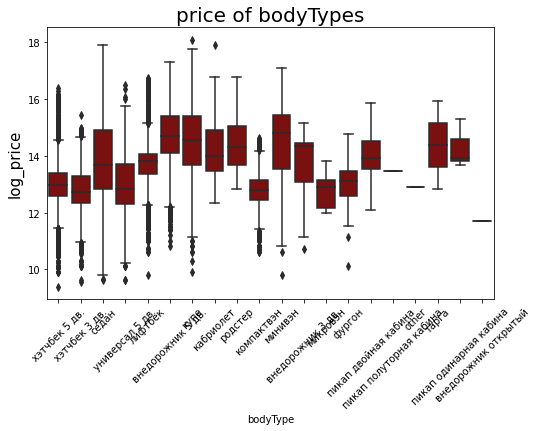

In [38]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='bodyType', 
                  data=traincc, color='darkred')
g1.set_title("price of bodyTypes", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [39]:
traincc = traincc.assign(bT_length = traincc['bodyType'].apply(len))
testcc = testcc.assign(bT_length = testcc['bodyType'].apply(len))

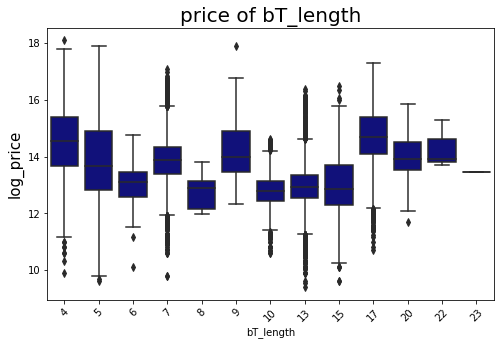

In [40]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='bT_length', 
                  data=traincc, color='darkblue')
g1.set_title("price of bT_length", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

**enginePower**

In [41]:
traincc['enginePower'].value_counts(),testcc['enginePower'].value_counts()

(150    5327
 249    4687
 140    1925
 190    1922
 110    1751
        ... 
 311       1
 477       1
 321       1
 232       1
 344       1
 Name: enginePower, Length: 336, dtype: int64,
 249    1708
 150    1699
 110    1039
 170     977
 105     955
        ... 
 38        1
 485       1
 324       1
 164       1
 32        1
 Name: enginePower, Length: 315, dtype: int64)

**Brand**

In [42]:
len(traincc.brand.value_counts()),len(testcc.brand.value_counts())



(23, 12)

In [43]:
brand = testcc.brand.value_counts()
brand

BMW           4473
VOLKSWAGEN    4404
NISSAN        4393
MERCEDES      4180
TOYOTA        3913
AUDI          3421
MITSUBISHI    2843
SKODA         2741
VOLVO         1463
HONDA         1150
INFINITI       871
LEXUS          834
Name: brand, dtype: int64

*–°—Ä–∞–≤–Ω–∏–º —Å —Ç–µ—Å—Ç–æ–º –æ—Å—Ç–∞–≤–∏–º –ø–æ –±—Ä–µ–Ω–¥–∞–º —Å —Ç–µ—Å—Ç–∞ , –∞ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –æ–±—ä–µ–¥–∏–Ω–∏–º –∫–∞–∫ otherBrand*

In [44]:
traincc['brand'] = traincc['brand'].apply(lambda x: x if x in brand else 'otherBrand')

In [45]:
traincc['brand'].value_counts()

MERCEDES      15337
otherBrand    12668
BMW            6145
NISSAN         5340
AUDI           3438
SKODA          3410
MITSUBISHI     3179
VOLKSWAGEN     3134
TOYOTA         2783
VOLVO          1886
LEXUS          1142
HONDA           880
INFINITI        800
Name: brand, dtype: int64

In [46]:
traincc.groupby('brand').price.describe()

count          mean           std       min        25%  \
brand                                                                  
AUDI         3438.0  2.434647e+06  2.112787e+06   25000.0   870000.0   
BMW          6145.0  3.711547e+06  2.831002e+06   42000.0  1490000.0   
HONDA         880.0  7.744780e+05  6.700825e+05   20000.0   375000.0   
INFINITI      800.0  2.071430e+06  1.516129e+06  250000.0  1100000.0   
LEXUS        1142.0  2.678252e+06  1.519643e+06  195000.0  1580000.0   
MERCEDES    15337.0  5.642694e+06  4.653787e+06   18000.0  2400000.0   
MITSUBISHI   3179.0  1.314455e+06  8.762441e+05   25000.0   390000.0   
NISSAN       5340.0  1.157522e+06  7.419125e+05   20000.0   570000.0   
SKODA        3410.0  1.037503e+06  6.307288e+05   25000.0   572750.0   
TOYOTA       2783.0  1.591789e+06  1.232877e+06   20000.0   530000.0   
VOLKSWAGEN   3134.0  1.254556e+06  1.187361e+06   15000.0   450000.0   
VOLVO        1886.0  2.375644e+06  1.831137e+06   12000.0   734736.5   
otherBrand  12668.0  9.229610e+05  1.389668e+06   14000.0   295000.0   

                  50%        75%         max  
brand                                         
AUDI        1830000.0  3540000.0  15460400.0  
BMW         3202700.0  4783500.0  16341200.0  
HONDA        575000.0   986250.0   5789063.0  
INFINITI    1600000.0  2586250.0   7335000.0  
LEXUS       2474500.0  3417500.0   9350000.0  
MERCEDES    4648260.0  8232840.0  72000000.0  
MITSUBISHI  1450000.0  2080500.0   5500000.0  
NISSAN       990000.0  1755000.0   6700000.0  
SKODA        889000.0  1305000.0   3623872.0  
TOYOTA      1400000.0  2450000.0   9185313.0  
VOLKSWAGEN   920000.0  1763775.0   6761700.0  
VOLVO       1750000.0  3997725.0   8047725.0  
otherBrand   499000.0   970000.0  59604352.0

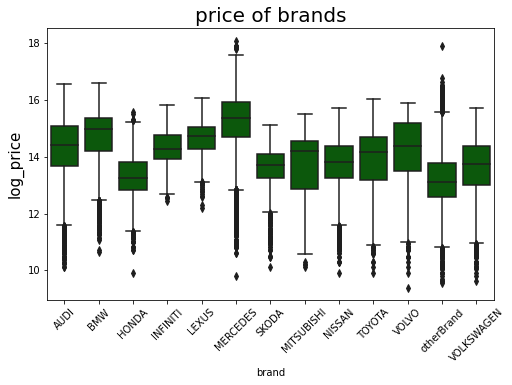

In [47]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='brand', 
                  data=traincc, color='darkgreen')
g1.set_title("price of brands", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

**–ö–∞–∫ –º—ã –≤–∏–¥–∏–º  BMW ,LEXUS –∏ Mercedes –¥–æ—Ä–æ–∂–µ **

In [48]:
traincc = traincc.assign(brand_length = traincc['brand'].apply(len))
testcc = testcc.assign(brand_length = testcc['brand'].apply(len))

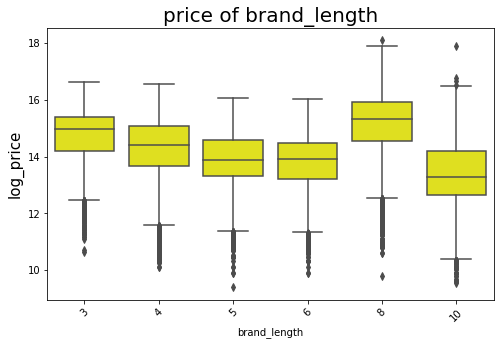

In [49]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='brand_length', 
                  data=traincc, color='yellow')
g1.set_title("price of brand_length", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [50]:
len(testcc.model_name.value_counts()), len(traincc.model_name.value_counts())

(544, 734)

In [51]:
testcc.equipment_dict.isna().sum(),traincc.equipment_dict.isna().sum()

(9996, 9459)

complectation_dict –∏ equipment_dict —É–¥–∞–ª—è–µ–º ,–º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [52]:
traincc.isna().sum().value_counts(), testcc.isna().sum().value_counts()

(0        57
 9459      1
 22486     1
 209       1
 dtype: int64,
 0        52
 28268     1
 22691     1
 9996      1
 dtype: int64)

–£ –Ω–∞—Å –µ—â–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –ø–æ train-> name , vehicleConfiguration,vehicleTransmission,–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è,–í–ª–∞–¥–µ–ª—å—Ü—ã,–í–ª–∞–¥–µ–Ω–∏–µ ,hidden , model.......

In [53]:
traincc.isna().sum().head(30),traincc.isna().sum().tail(33)

(bodyType                    0
 brand                       0
 description                 0
 engineDisplacement          0
 enginePower                 0
 equipment_dict           9459
 fuelType                    0
 image                       0
 mileage                     0
 modelDate                   0
 model_info                  0
 model_name                  0
 name                        0
 numberOfDoors               0
 parsing_unixtime            0
 productionDate              0
 sell_id                     0
 section                     0
 url_saleid                  0
 super_gen                   0
 vehicleConfiguration        0
 vehicleTransmission         0
 vendor                      0
 –í–ª–∞–¥–µ–ª—å—Ü—ã               22486
 –ü–¢–°                         0
 –ü—Ä–∏–≤–æ–¥                      0
 –†—É–ª—å                        0
 price                       0
 auto_class                209
 price_segment               0
 dtype: int64,
 price                         0


In [54]:
# testcc.isna().sum().head(30)

In [55]:
# traincc['model_name'] = traincc['model_name'].fillna(traincc['model'])

In [56]:
traincc.model_info[4],testcc.model_info[4]

("{'code': 'A1', 'name': 'A1', 'ru_name': '–ê1', 'morphology': {}, 'nameplate': {'code': '', 'name': '', 'semantic_url': ''}}",
 '{"code":"OCTAVIA","name":"Octavia","ru_name":"–û–∫—Ç–∞–≤–∏—è","morphology":{"gender":"FEMININE"},"nameplate":{"code":"","name":"","semantic_url":""}}')

In [57]:
testcc.equipment_dict.value_counts().head(5)

{"leather":true}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           108
{"gbo":true}                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [58]:
testcc.name[:30]

0          1.2 AMT (105 –ª.—Å.)
1           1.6 MT (110 –ª.—Å.)
2      DSG 1.8 AMT (152 –ª.—Å.)
3           1.6 AT (110 –ª.—Å.)
4           1.8 AT (152 –ª.—Å.)
5          2.0 AMT (200 –ª.—Å.)
6      1.8 AMT (152 –ª.—Å.) 4WD
7           1.6 MT (102 –ª.—Å.)
8       1.4 MT (150 –ª.—Å.) 4WD
9       1.8 MT (152 –ª.—Å.) 4WD
10           1.6 MT (90 –ª.—Å.)
11         1.4 AMT (150 –ª.—Å.)
12         1.8 AMT (180 –ª.—Å.)
13     1.4 AMT (150 –ª.—Å.) 4WD
14          1.6 AT (102 –ª.—Å.)
15         1.4 AMT (150 –ª.—Å.)
16         1.8 AMT (180 –ª.—Å.)
17         1.4 AMT (150 –ª.—Å.)
18          1.6 AT (110 –ª.—Å.)
19          1.6 AT (110 –ª.—Å.)
20     1.4 AMT (150 –ª.—Å.) 4WD
21    2.0d AMT (150 –ª.—Å.) 4WD
22          1.6 AT (110 –ª.—Å.)
23          1.8 AT (152 –ª.—Å.)
24         2.0 AMT (220 –ª.—Å.)
25          1.2 MT (105 –ª.—Å.)
26     DSG 1.8 AMT (152 –ª.—Å.)
27         1.8 AMT (180 –ª.—Å.)
28          1.4 MT (122 –ª.—Å.)
29          1.6 AT (105 –ª.—Å.)
Name: name, dtype: object

equipment_dict,name,model_info –º–æ–∂–µ–º —É–¥–∞–ª–∏—Ç—å ,–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ–¥—É–±–ª–∏—Ä–æ–≤–∞–Ω—ã

**enginePower**

<AxesSubplot:>

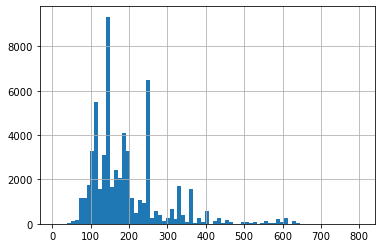

In [59]:
traincc['enginePower'].hist(bins=77)

In [60]:
traincc.enginePower.describe()

count    60142.000000
mean       194.127515
std         96.520143
min          7.000000
25%        135.000000
50%        169.000000
75%        245.000000
max        800.000000
Name: enginePower, dtype: float64

In [61]:
traincc['log_power'] = np.log(traincc.enginePower)

<AxesSubplot:>

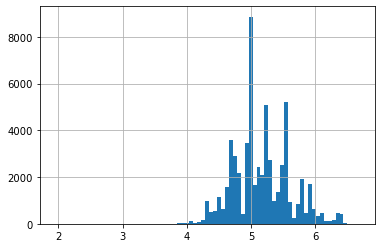

In [62]:
traincc['log_power'].hist(bins=77)

–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ enginePower –º–µ—Ç—Ä–∏–∫—É —Å–∏–ª—å–Ω–æ  –Ω–µ —É–ª—É—á—à–∏–ª–æ.–ü–æ–ø—Ä–æ–±—É–µ–º –≤–≤–µ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –Ω–∞–ª–æ–≥—É –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç enginePower.

In [63]:
bins = [10, 35, 100, 125, 150, 175, 200, 225, 250, 801]
numbers = ['5000','12','25','35', '45', '50', '65', '75', '150']

In [64]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   bodyType                  34686 non-null  object
 1   brand                     34686 non-null  object
 2   car_url                   34686 non-null  object
 3   color                     34686 non-null  object
 4   complectation_dict        6418 non-null   object
 5   description               34686 non-null  object
 6   engineDisplacement        34686 non-null  object
 7   enginePower               34686 non-null  int64 
 8   equipment_dict            24690 non-null  object
 9   fuelType                  34686 non-null  object
 10  image                     34686 non-null  object
 11  mileage                   34686 non-null  int64 
 12  modelDate                 34686 non-null  int64 
 13  model_info                34686 non-null  object
 14  model_name            

In [65]:
traincc['Nalog_base']=pd.cut(traincc['enginePower'],bins,labels=numbers)
testcc['Nalog_base']=pd.cut(testcc['enginePower'],bins,labels=numbers)


In [66]:
# traincc['Nalog_base'].dropna()
traincc.dropna(subset=['Nalog_base'], inplace=True)

In [67]:
traincc['Nalog_base'] = traincc['Nalog_base'].values.astype('int64')
testcc['Nalog_base'] = testcc['Nalog_base'].values.astype('int64')

In [68]:
traincc['Nalog_base']

0        25
1        25
2        25
3        25
4        25
         ..
60137    25
60138    25
60139    12
60140    12
60141    12
Name: Nalog_base, Length: 60141, dtype: int64

In [69]:
testcc['enginePower'] = testcc['enginePower'].astype(float)

In [70]:
traincc['enginePower'] = traincc['enginePower'].astype(float)

In [71]:
testcc.enginePower.describe()

count    34686.000000
mean       188.194142
std         89.087035
min         30.000000
25%        125.000000
50%        169.000000
75%        233.000000
max        639.000000
Name: enginePower, dtype: float64

In [72]:
testcc['log_power'] = np.log(testcc.enginePower)

In [73]:
traincc['Nalog'] = traincc['enginePower'] * traincc['Nalog_base']
testcc['Nalog'] = testcc['enginePower'] * testcc['Nalog_base']

In [74]:
traincc['Nalog'] = traincc['Nalog'].astype(float)
testcc['Nalog'] = testcc['Nalog'].astype(float)

In [75]:
traincc['Nalog'] ,testcc['Nalog']

(0        3125.0
 1        3050.0
 2        3050.0
 3        3050.0
 4        3050.0
           ...  
 60137    2875.0
 60138    2875.0
 60139    1080.0
 60140    1080.0
 60141     900.0
 Name: Nalog, Length: 60141, dtype: float64,
 0         2625.0
 1         2750.0
 2         6840.0
 3         2750.0
 4         6840.0
           ...   
 34681     4760.0
 34682     9500.0
 34683     7650.0
 34684     9200.0
 34685    17625.0
 Name: Nalog, Length: 34686, dtype: float64)

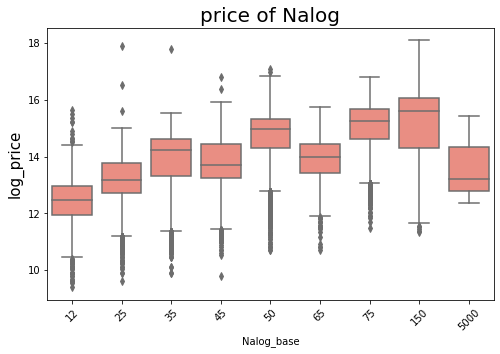

In [76]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='Nalog_base', 
                  data=traincc, color='salmon')
g1.set_title("price of Nalog", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

<AxesSubplot:xlabel='Nalog'>

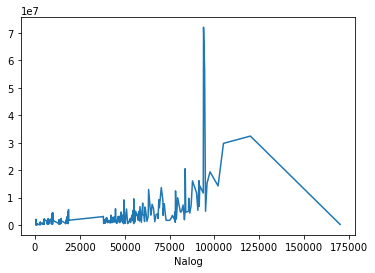

In [77]:
traincc.groupby('Nalog').price.mean().plot()


engineDisplacement

In [78]:
traincc.engineDisplacement.value_counts()

1598    7204
1998    3767
1991    2971
1997    2924
2925    2342
        ... 
3318       1
2084       1
1200       1
2404       1
1452       1
Name: engineDisplacement, Length: 479, dtype: int64

In [79]:
traincc['engineDisplacement'] = traincc['engineDisplacement'].values.astype('int')

In [80]:
# traincc['engineDisplacement'] = traincc['engineDisplacement'].apply(lambda x: x[:3])
testcc['engineDisplacement'] = testcc['engineDisplacement'].apply(lambda x: x[:3])

In [81]:
test['engineDisplacement'].value_counts()

2.0 LTR    7391
1.6 LTR    4973
3.0 LTR    3915
1.8 LTR    3349
2.5 LTR    2477
2.4 LTR    1745
3.5 LTR    1710
1.4 LTR    1635
1.5 LTR     725
1.2 LTR     485
4.4 LTR     447
2.8 LTR     384
4.7 LTR     377
1.3 LTR     365
5.5 LTR     361
4.0 LTR     356
3.2 LTR     348
4.5 LTR     346
2.1 LTR     271
3.7 LTR     242
2.2 LTR     236
4.2 LTR     228
1.9 LTR     221
2.3 LTR     203
2.7 LTR     189
3.6 LTR     183
5.6 LTR     170
5.0 LTR     158
5.7 LTR     135
2.9 LTR     131
4.6 LTR     108
3.1 LTR      88
4.8 LTR      84
1.7 LTR      59
3.8 LTR      57
1.0 LTR      57
2.6 LTR      55
 LTR         55
6.0 LTR      53
0.7 LTR      53
3.3 LTR      44
3.4 LTR      36
4.1 LTR      35
4.3 LTR      32
5.4 LTR      31
6.2 LTR      28
5.9 LTR      12
5.2 LTR      12
6.3 LTR       8
5.8 LTR       7
6.6 LTR       6
4.9 LTR       4
1.1 LTR       4
5.3 LTR       1
3.9 LTR       1
Name: engineDisplacement, dtype: int64

In [82]:
train['engineDisplacement'].value_counts()

1598    7204
1998    3767
1991    2971
1997    2924
2925    2342
        ... 
3318       1
2084       1
1200       1
2404       1
1452       1
Name: engineDisplacement, Length: 479, dtype: int64

In [83]:
traincc[traincc['engineDisplacement'] == 'S4']

Empty DataFrame
Columns: [bodyType, brand, description, engineDisplacement, enginePower, equipment_dict, fuelType, image, mileage, modelDate, model_info, model_name, name, numberOfDoors, parsing_unixtime, productionDate, sell_id, section, url_saleid, super_gen, vehicleConfiguration, vehicleTransmission, vendor, –í–ª–∞–¥–µ–ª—å—Ü—ã, –ü–¢–°, –ü—Ä–∏–≤–æ–¥, –†—É–ª—å, price, auto_class, price_segment, seller_type, color, description_word, leather, carter, ABS, airbags, immob, central_locking, on_board_computer, cruise_control, climat_control, multi_rudder, power_steering, light_and_rain_sensors, —Åarbon_body_kits, rear_diffuser_rkp, door_closers, rear_view_camera, amg, bi_xenon_headlights, from_salon, alloy_wheels, parking_sensors, dents, roof_with_panoramic_view, mileageNAN, log_price, bT_length, brand_length, log_power, Nalog_base, Nalog]
Index: []

[0 rows x 63 columns]

In [84]:
len(testcc[testcc['engineDisplacement'] == ' LT'])

55

In [85]:
traincc[traincc['engineDisplacement'] == ' LT']

Empty DataFrame
Columns: [bodyType, brand, description, engineDisplacement, enginePower, equipment_dict, fuelType, image, mileage, modelDate, model_info, model_name, name, numberOfDoors, parsing_unixtime, productionDate, sell_id, section, url_saleid, super_gen, vehicleConfiguration, vehicleTransmission, vendor, –í–ª–∞–¥–µ–ª—å—Ü—ã, –ü–¢–°, –ü—Ä–∏–≤–æ–¥, –†—É–ª—å, price, auto_class, price_segment, seller_type, color, description_word, leather, carter, ABS, airbags, immob, central_locking, on_board_computer, cruise_control, climat_control, multi_rudder, power_steering, light_and_rain_sensors, —Åarbon_body_kits, rear_diffuser_rkp, door_closers, rear_view_camera, amg, bi_xenon_headlights, from_salon, alloy_wheels, parking_sensors, dents, roof_with_panoramic_view, mileageNAN, log_price, bT_length, brand_length, log_power, Nalog_base, Nalog]
Index: []

[0 rows x 63 columns]

In [86]:
traincc.groupby('engineDisplacement').enginePower.describe().head(20)

count        mean         std    min     25%    50%  \
engineDisplacement                                                        
0                   109.0  277.137615  147.947467   11.0  109.00  408.0   
582                   1.0   19.000000         NaN   19.0   19.00   19.0   
647                  11.0  171.272727    4.221159  170.0  170.00  170.0   
656                   4.0   56.750000    8.845903   46.0   51.25   58.5   
657                   4.0   49.000000    2.000000   48.0   48.00   48.0   
658                  35.0   54.057143    5.017281   46.0   52.00   52.0   
659                   1.0   64.000000         NaN   64.0   64.00   64.0   
875                   1.0   85.000000         NaN   85.0   85.00   85.0   
970                   1.0   45.000000         NaN   45.0   45.00   45.0   
973                  11.0   55.090909    1.868397   54.0   54.00   54.0   
989                   1.0   64.000000         NaN   64.0   64.00   64.0   
993                   3.0   53.000000    0.000000   53.0   53.00   53.0   
996                  11.0   74.454545   12.168514   68.0   69.00   69.0   
997                   5.0   70.000000    0.000000   70.0   70.00   70.0   
998                  53.0   65.207547    4.096708   54.0   60.00   68.0   
999                  11.0   64.000000    6.928203   50.0   67.00   67.0   
1061                  1.0   62.000000         NaN   62.0   62.00   62.0   
1094                  2.0   80.000000    0.000000   80.0   80.00   80.0   
1100                  1.0   48.000000         NaN   48.0   48.00   48.0   
1108                  3.0   55.000000    0.000000   55.0   55.00   55.0   

                      75%    max  
engineDisplacement                
0                   408.0  680.0  
582                  19.0   19.0  
647                 170.0  184.0  
656                  64.0   64.0  
657                  49.0   52.0  
658                  56.5   64.0  
659                  64.0   64.0  
875                  85.0   85.0  
970                  45.0   45.0  
973                  56.0   58.0  
989                  64.0   64.0  
993                  53.0   53.0  
996                  70.0  100.0  
997                  70.0   70.0  
998                  68.0   69.0  
999                  67.0   68.0  
1061                 62.0   62.0  
1094                 80.0   80.0  
1100                 48.0   48.0  
1108                 55.0   55.0

In [87]:
traincc['engineDisplacement'] = traincc['engineDisplacement'].apply(lambda x: 1.6 if x == ' LT' else x)
testcc['engineDisplacement'] = testcc['engineDisplacement'].apply(lambda x: 1.6 if x == ' LT' else x)

In [88]:
traincc['engineDisplacement'].value_counts()[:41].keys()

Int64Index([1598, 1998, 1991, 1997, 2925, 1950, 1995, 1984, 2993, 1798, 1395,
            2999, 3498, 1796, 1595, 1390, 1969, 1332, 2488, 2996, 2967, 1499,
            3982, 2987, 2143, 1968, 4395, 1781, 1999, 1587, 2995, 2487, 1364,
            3456, 2979, 2360, 1197, 1584, 1987, 1590, 1586],
           dtype='int64')

In [89]:
brand_list = list(traincc['engineDisplacement'].value_counts()[:41].keys())
traincc['engineDisplacement'] = traincc['engineDisplacement'].apply(lambda x: x if x in brand_list else 1.8)


<AxesSubplot:>

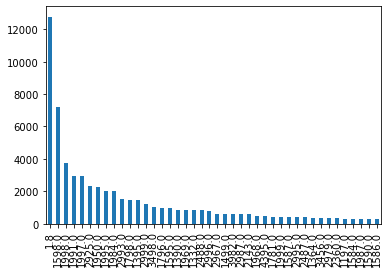

In [90]:
traincc['engineDisplacement'] = traincc['engineDisplacement'].astype('float')
traincc['engineDisplacement'].value_counts().plot(kind='bar')

In [91]:
traincc.vehicleTransmission.value_counts(),testcc.vehicleTransmission.value_counts()


(–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è      35006
 –º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è        11197
 —Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è     7381
 –≤–∞—Ä–∏–∞—Ç–æ—Ä–Ω–∞—è          6557
 Name: vehicleTransmission, dtype: int64,
 –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è      19596
 –º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è         7209
 –≤–∞—Ä–∏–∞—Ç–æ—Ä             3999
 —Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è     3882
 Name: vehicleTransmission, dtype: int64)

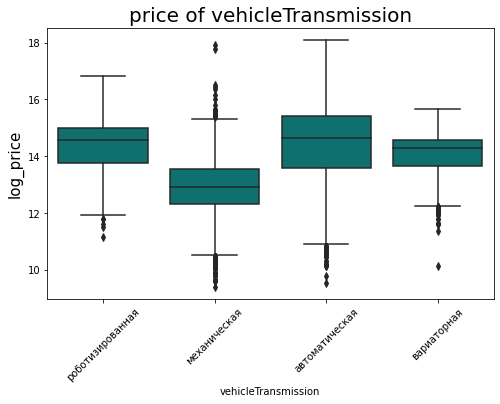

In [92]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='vehicleTransmission', 
                  data=traincc, color='teal')
g1.set_title("price of vehicleTransmission", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [93]:
traincc.vehicleConfiguration[67]

'SEDAN MECHANICAL 1.8\xa0MT'

In [94]:
testcc[testcc.numberOfDoors == 0] 

bodyType     brand                                            car_url  \
16944  –∫–∞–±—Ä–∏–æ–ª–µ—Ç  MERCEDES  https://auto.ru/cars/used/sale/mercedes/simple...   

       color complectation_dict  \
16944  –±–µ–ª—ã–π                NaN   

                                             description engineDisplacement  \
16944  –Ω–∞ —Ö–æ–¥—É. 1904 –≥–æ–¥. —Å—Ç–æ–∏—Ç –≤ –≥–∞—Ä–∞–∂–µ, –ø—ã–ª–∏—Ç—Å—è.–ö–∞—Ç...                5.3   

       enginePower equipment_dict fuelType  ... from_salon  alloy_wheels  \
16944         32.0            NaN   –±–µ–Ω–∑–∏–Ω  ...          0             0   

       parking_sensors dents roof_with_panoramic_view bT_length  brand_length  \
16944                0     0                        0         9             8   

       Nalog_base  log_power     Nalog  
16944        5000   3.465736  160000.0  

[1 rows x 58 columns]

In [95]:
traincc[traincc.numberOfDoors == 0]

Empty DataFrame
Columns: [bodyType, brand, description, engineDisplacement, enginePower, equipment_dict, fuelType, image, mileage, modelDate, model_info, model_name, name, numberOfDoors, parsing_unixtime, productionDate, sell_id, section, url_saleid, super_gen, vehicleConfiguration, vehicleTransmission, vendor, –í–ª–∞–¥–µ–ª—å—Ü—ã, –ü–¢–°, –ü—Ä–∏–≤–æ–¥, –†—É–ª—å, price, auto_class, price_segment, seller_type, color, description_word, leather, carter, ABS, airbags, immob, central_locking, on_board_computer, cruise_control, climat_control, multi_rudder, power_steering, light_and_rain_sensors, —Åarbon_body_kits, rear_diffuser_rkp, door_closers, rear_view_camera, amg, bi_xenon_headlights, from_salon, alloy_wheels, parking_sensors, dents, roof_with_panoramic_view, mileageNAN, log_price, bT_length, brand_length, log_power, Nalog_base, Nalog]
Index: []

[0 rows x 63 columns]

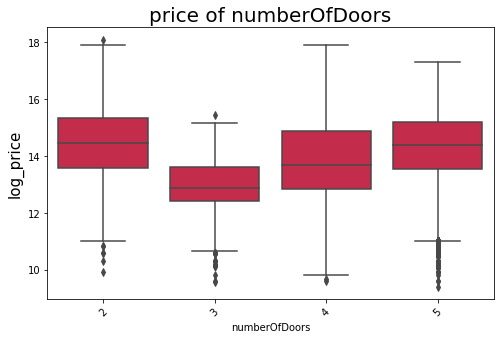

In [96]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='numberOfDoors', 
                  data=traincc, color='crimson')
g1.set_title("price of numberOfDoors", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

In [97]:
display(pd.DataFrame(traincc.color.value_counts()))

color
—á–µ—Ä–Ω—ã–π       18328
–±–µ–ª—ã–π        11599
—Å–µ—Ä—ã–π         7807
—Å–∏–Ω–∏–π         7118
—Å–µ—Ä–µ–±—Ä–∏—Å—Ç—ã–π   5034
–∫—Ä–∞—Å–Ω—ã–π       2975
–∫–æ—Ä–∏—á–Ω–µ–≤—ã–π    2245
–∑–µ–ª—ë–Ω—ã–π       1550
–±–µ–∂–µ–≤—ã–π.      1172
–≥–æ–ª—É–±–æ–π        808
–æ—Ä–∞–Ω–∂–µ–≤—ã–π      307
–∑–æ–ª–æ—Ç–∏—Å—Ç—ã–π     306
–∂—ë–ª—Ç—ã–π         296
—Ñ–∏–æ–ª–µ—Ç–æ–≤—ã–π     294
–ø—É—Ä–ø—É—Ä–Ω—ã–π      291
—Ä–æ–∑–æ–≤—ã–π         11

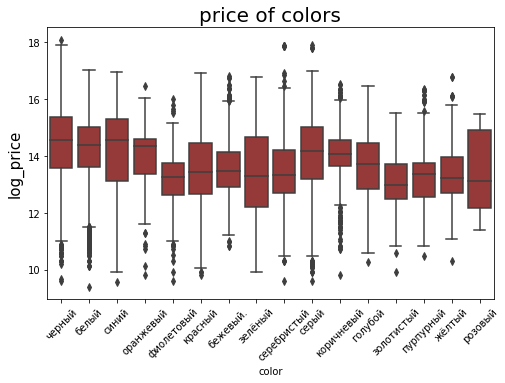

In [98]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='color', 
                  data=traincc, color='brown')
g1.set_title("price of colors", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

–£–∑–Ω–∞–µ–º —Å–∫–æ–ª—å–∫–æ –≥–æ–¥ –º–∞—à–∏–Ω—É

In [99]:
traincc['years_old'] = 2021 - traincc['productionDate']
testcc['years_old'] = 2021 - testcc['productionDate']

<AxesSubplot:>

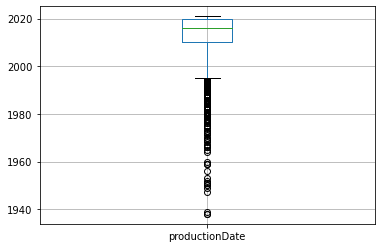

In [100]:
traincc.boxplot(column=['productionDate'])


In [101]:
traincc.years_old.value_counts().head(10)

1     15844
0      6668
9      3014
13     2972
10     2919
8      2777
7      2616
14     2100
2      1990
6      1966
Name: years_old, dtype: int64

In [102]:
traincc.years_old.describe(),testcc.years_old.describe()

(count    60141.000000
 mean         7.209275
 std          7.380562
 min          0.000000
 25%          1.000000
 50%          5.000000
 75%         11.000000
 max         83.000000
 Name: years_old, dtype: float64,
 count    34686.000000
 mean        11.735398
 std          7.047661
 min          1.000000
 25%          7.000000
 50%         10.000000
 75%         15.000000
 max        117.000000
 Name: years_old, dtype: float64)

*–†–∞–∑–æ–±—å–µ–º –≤–æ–∑—Ä–∞—Å—Ç –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã*

In [103]:
bins = [-1, 3, 7, 14, 20, 35, 117]
numbers = ['3', '7','14','20','35', '117']

traincc['age_intervals']=pd.cut(traincc['years_old'],bins,labels=numbers)
testcc['age_intervals']=pd.cut(testcc['years_old'],bins,labels=numbers)

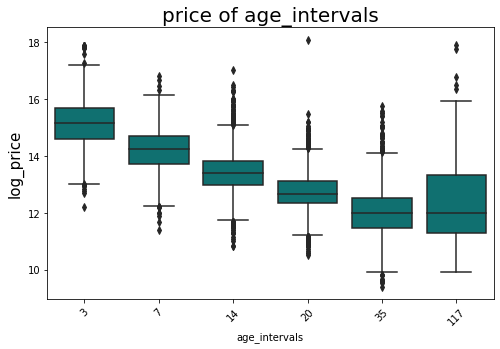

In [104]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='age_intervals', 
                  data=traincc, color='teal')
g1.set_title("price of age_intervals", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

modelDate

In [105]:
traincc.modelDate.describe(),testcc.modelDate.describe()

(count    60141.000000
 mean      2011.661429
 std          7.655939
 min       1936.000000
 25%       2007.000000
 50%       2013.000000
 75%       2018.000000
 max       2020.000000
 Name: modelDate, dtype: float64,
 count    34686.000000
 mean      2007.074728
 std          7.415894
 min       1904.000000
 25%       2004.000000
 50%       2008.000000
 75%       2012.000000
 max       2020.000000
 Name: modelDate, dtype: float64)

In [106]:
traincc.modelDate.value_counts().head()

2019    7261
2018    6737
2017    5183
2020    3646
2006    3008
Name: modelDate, dtype: int64

–í–ª–∞–¥–µ–ª—å—Ü—ã

In [107]:
traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna().sum(),testcc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna().sum(),

(22486, 0)

In [108]:
traincc.–í–ª–∞–¥–µ–ª—å—Ü—ã.value_counts() ,testcc.–í–ª–∞–¥–µ–ª—å—Ü—ã.value_counts()

(3.0    15041
 1.0    11186
 2.0     9853
 4.0     1575
 Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: int64,
 3 –∏–ª–∏ –±–æ–ª–µ–µ    15957
 1¬†–≤–ª–∞–¥–µ–ª–µ—Ü      9459
 2¬†–≤–ª–∞–¥–µ–ª—å—Ü–∞     9270
 Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: int64)

In [109]:
testcc['–í–ª–∞–¥–µ–ª—å—Ü—ã']= testcc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].astype('category')
traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã']= traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].astype('category')

traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã']= traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].apply(lambda x: int(re.findall('\d', str(x))[0]))
testcc['–í–ª–∞–¥–µ–ª—å—Ü—ã']= testcc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].apply(lambda x: int(re.findall('\d', str(x))[0]))

<AxesSubplot:xlabel='–í–ª–∞–¥–µ–ª—å—Ü—ã', ylabel='count'>

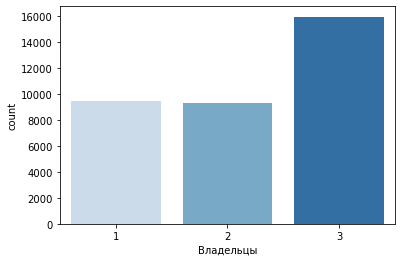

In [110]:
sns.countplot(x = "–í–ª–∞–¥–µ–ª—å—Ü—ã", data = testcc, palette = "Blues")

<AxesSubplot:xlabel='–í–ª–∞–¥–µ–ª—å—Ü—ã', ylabel='count'>

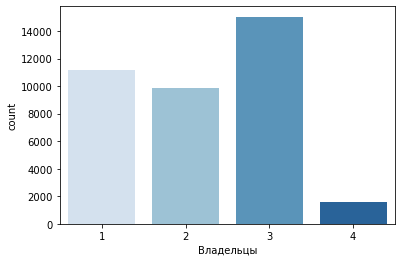

In [111]:
sns.countplot(x = "–í–ª–∞–¥–µ–ª—å—Ü—ã", data = traincc, palette = "Blues")

In [112]:
traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'] = traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].astype("category")

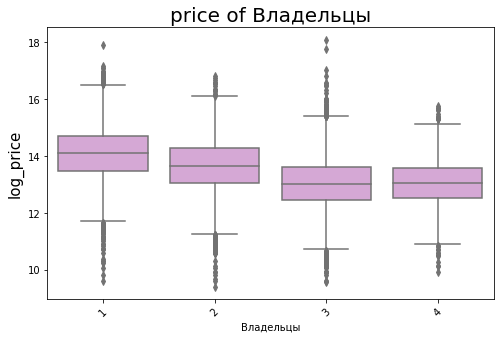

In [113]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='–í–ª–∞–¥–µ–ª—å—Ü—ã', 
                  data=traincc, color='plum')
g1.set_title("price of –í–ª–∞–¥–µ–ª—å—Ü—ã", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

 –ß–∏—Å–ª–æ –≤–ª–∞–¥–µ–ª—å—Ü–∞ –Ω–∞–ø—Ä—è–º—É—é –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É.–ö–∞–∫ –º—ã –≤–∏–¥–∏–º –µ—Å–ª–∏ –≤ –º–∞—à–∏–Ω–µ  1 –í–ª–∞–¥–µ–ª–µ—Ü,—Ç–æ —ç—Ç–æ—Ç –º–∞—à–∏–Ω–∞ –¥–æ—Ä–æ–∂–µ —á–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ

–í–ª–∞–¥–µ–Ω–∏–µ

In [114]:
traincc.–í–ª–∞–¥–µ–ª—å—Ü—ã.isna().sum(),testcc.–í–ª–∞–¥–µ–Ω–∏–µ.isna().sum()

(22486, 22691)

In [115]:
traincc.groupby('–í–ª–∞–¥–µ–ª—å—Ü—ã').describe()

engineDisplacement                                                 \
                       count         mean          std  min     25%     50%   
–í–ª–∞–¥–µ–ª—å—Ü—ã                                                                     
1                    11186.0  1638.603236   968.877129  1.8  1395.0  1781.0   
2                     9853.0  1466.178281  1075.159402  1.8     1.8  1598.0   
3                    15041.0  1203.641261  1103.913360  1.8     1.8  1595.0   
4                     1575.0  1070.058286  1212.217745  1.8     1.8     1.8   

                          enginePower              ...    Nalog            \
              75%     max       count        mean  ...      75%       max   
–í–ª–∞–¥–µ–ª—å—Ü—ã                                          ...                      
1          1998.0  4395.0     11186.0  182.102718  ...  13715.0   95850.0   
2          1997.0  4395.0      9853.0  182.650969  ...  14625.0   93750.0   
3          1984.0  4395.0     15041.0  172.180906  ...  13715.0  170000.0   
4          1984.0  4395.0      1575.0  186.939048  ...  14560.0   91800.0   

          years_old                                                    
              count       mean       std  min   25%   50%   75%   max  
–í–ª–∞–¥–µ–ª—å—Ü—ã                                                              
1           11186.0   6.516002  4.724049  0.0   3.0   6.0   9.0  74.0  
2            9853.0   9.891302  5.438940  1.0   7.0   9.0  13.0  83.0  
3           15041.0  14.645968  6.615131  0.0  10.0  13.0  18.0  83.0  
4            1575.0  16.867302  6.746229  2.0  12.0  16.0  21.5  43.0  

[4 rows x 320 columns]

–†–£–õ–¨

In [116]:
testcc.–†—É–ª—å.value_counts(), traincc.–†—É–ª—å.value_counts()

(–õ–µ–≤—ã–π     33287
 –ü—Ä–∞–≤—ã–π     1399
 Name: –†—É–ª—å, dtype: int64,
 –ª–µ–≤—ã–π     33296
 –õ–µ–≤—ã–π     25792
 –ü—Ä–∞–≤—ã–π      625
 –ø—Ä–∞–≤—ã–π      428
 Name: –†—É–ª—å, dtype: int64)

<AxesSubplot:>

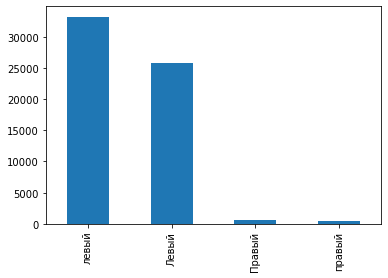

In [117]:
rule={'LEFT': '–õ–µ–≤—ã–π', 'RIGHT': '–ü—Ä–∞–≤—ã–π' }
traincc['–†—É–ª—å'] = traincc['–†—É–ª—å'].replace(rule)
traincc['–†—É–ª—å'].value_counts().plot.bar()

    **–ö–∞–∫ –ø—Ä–∞–≤–∏–ª–æ ,–≤–∏–¥–∏–º —á—Ç–æ –ª–µ–≤–æ—Ä—É–ª—å–∫–∏ –±–æ–ª—å—à–µ —á–µ–º –ø—Ä–∞–≤—ã–π**

**fuelType**

In [118]:
traincc.fuelType.value_counts(),testcc.fuelType.value_counts()

(–±–µ–Ω–∑–∏–Ω     46907
 –¥–∏–∑–µ–ª—å     12927
 –≥–∏–±—Ä–∏–¥       191
 —ç–ª–µ–∫—Ç—Ä–æ      109
 –≥–∞–∑            7
 Name: fuelType, dtype: int64,
 –±–µ–Ω–∑–∏–Ω     28601
 –¥–∏–∑–µ–ª—å      5800
 –≥–∏–±—Ä–∏–¥       223
 —ç–ª–µ–∫—Ç—Ä–æ       55
 –≥–∞–∑            7
 Name: fuelType, dtype: int64)

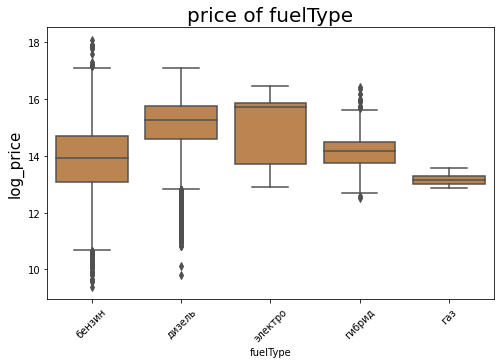

In [119]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='fuelType', 
                  data=traincc, color='peru')
g1.set_title("price of fuelType", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


plt.show()

In [120]:
testcc.super_gen[2]

'{"id":"20026323","nameplate":"DSG","displacement":1798,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"ROBOT","power":152,"power_kvt":112,"human_name":"DSG 1.8 AMT (152 –ª.—Å.)","acceleration":8.7,"clearance_min":139,"fuel_rate":7.1,"clearance_max":158}'

**vendor**

In [121]:
traincc.vendor.value_counts(),testcc.vendor.value_counts()

(EUROPEAN    42370
 JAPANESE    17770
 RUSSIAN         1
 Name: vendor, dtype: int64,
 EUROPEAN    20682
 JAPANESE    14004
 Name: vendor, dtype: int64)

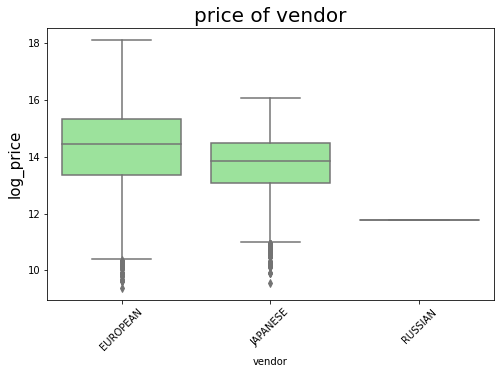

In [122]:
plt.figure(figsize=(8, 5))
g1 = sns.boxplot(y='log_price', x='vendor', 
                  data=traincc, color='lightgreen')
g1.set_title("price of vendor", fontsize=20)

g1.set_ylabel("log_price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


plt.show()

mileage

In [123]:
traincc.mileage.describe()

count      60141.000000
mean       95348.218686
std       106489.053980
min            0.000000
25%            0.000000
50%        70070.000000
75%       160883.000000
max      1000000.000000
Name: mileage, dtype: float64

In [124]:
traincc[traincc.mileage == 0].groupby('years_old').price.describe()

count          mean           std        min        25%  \
years_old                                                              
0           6657.0  5.067661e+06  3.708994e+06   905000.0  2403500.0   
1          15314.0  5.032906e+06  3.744219e+06   625000.0  2287037.5   
2            489.0  7.431977e+06  4.721587e+06  1641000.0  3190000.0   
3             26.0  3.108156e+07  2.593080e+07  2051000.0  6450863.0   

                  50%         75%         max  
years_old                                      
0           4214000.0   6350024.0  24365400.0  
1           3942600.0   7050000.0  32400000.0  
2           6940980.0  11778335.0  19947600.0  
3          26231045.5  58043592.0  58997576.0

In [125]:
traincc.groupby('years_old').mileage.mean().head(10)


years_old
0         0.033443
1       208.989334
2     19318.637688
3     49638.123018
4     70301.965785
5     85483.949340
6    100295.986267
7    112653.612768
8    124071.958228
9    137507.858660
Name: mileage, dtype: float64

–ú—ã —Å—á–∏—Ç–∞–ª–∏ —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–∞ –ø–µ—Ä–≤—ã–π –≥–æ–¥ –º–∞—à–∏–Ω–∞ –ø—Ä–æ—Ö–æ–¥–∏—Ç –¥–æ 10 000 –∫–º, –∞ –ø–æ—Å–ª–µ –ø–æ  –∫–∞–∫ –º–∏–Ω–∏–º—É–º 20000 

In [126]:
traincc['mileageNAN'] = traincc.mileageNAN * (traincc.years_old * 20000 + 10000)

In [127]:
traincc.mileage = traincc.mileage + traincc.mileageNAN

In [128]:
traincc.mileage.describe()

count      60141.000000
mean      104530.972548
std        98828.827131
min            1.000000
25%        30000.000000
50%        70070.000000
75%       160883.000000
max      1000000.000000
Name: mileage, dtype: float64

In [129]:
traincc.groupby('years_old').mileage.mean().head(10)


years_old
0      9983.536743
1     29205.454873
2     31605.069849
3     50633.202296
4     70301.965785
5     85483.949340
6    100295.986267
7    112653.612768
8    124071.958228
9    137507.858660
Name: mileage, dtype: float64

In [130]:
traincc[traincc.mileage == 1].productionDate

8047     2021
11175    2020
11176    2020
11236    2020
11237    2020
11238    2020
11239    2020
32182    2020
35326    2001
41458    1967
51645    1956
Name: productionDate, dtype: int64

–ù–æ–≤—ã–π –º–∞—à–∏–Ω–∞ –ø—Ä–æ–±–µ–≥ = 1 —ç—Ç–æ —Å–ª–∏—à–∫–æ–º –º–∞–ª–æ .–ü–æ—ç—Ç–æ–º—É —Ç–æ–∂–µ –∏–∑–º–µ–Ω–∏–º

In [131]:
traincc['mileage'] = traincc['mileage'].apply(lambda x: 1000 if x <100 else x)
testcc['mileage'] = testcc['mileage'].apply(lambda x: 1000 if x < 100 else x)

In [132]:
traincc.mileage.describe(),testcc.mileage.describe()

(count      60141.000000
 mean      104533.468233
 std        98826.200282
 min          100.000000
 25%        30000.000000
 50%        70070.000000
 75%       160883.000000
 max      1000000.000000
 Name: mileage, dtype: float64,
 count      34686.000000
 mean      162012.941360
 std       100671.468542
 min          100.000000
 25%        91153.500000
 50%       149779.500000
 75%       215000.000000
 max      1000000.000000
 Name: mileage, dtype: float64)

–ü—Ä–∏–≤–æ–¥

In [133]:
testcc.–ü—Ä–∏–≤–æ–¥.value_counts(),traincc.–ü—Ä–∏–≤–æ–¥.value_counts()

(–ø–µ—Ä–µ–¥–Ω–∏–π    15565
 –ø–æ–ª–Ω—ã–π      15020
 –∑–∞–¥–Ω–∏–π       4101
 Name: –ü—Ä–∏–≤–æ–¥, dtype: int64,
 –ø–æ–ª–Ω—ã–π      31369
 –ø–µ—Ä–µ–¥–Ω–∏–π    23759
 –∑–∞–¥–Ω–∏–π       5013
 Name: –ü—Ä–∏–≤–æ–¥, dtype: int64)

<AxesSubplot:xlabel='–ü—Ä–∏–≤–æ–¥', ylabel='count'>

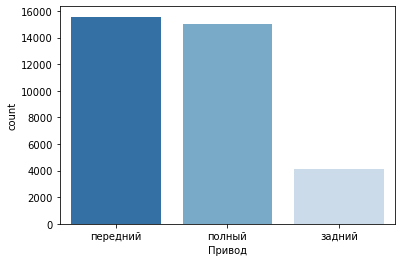

In [134]:
sns.countplot(x = "–ü—Ä–∏–≤–æ–¥", data = testcc, palette = "Blues_r")

<AxesSubplot:xlabel='–ü—Ä–∏–≤–æ–¥', ylabel='count'>

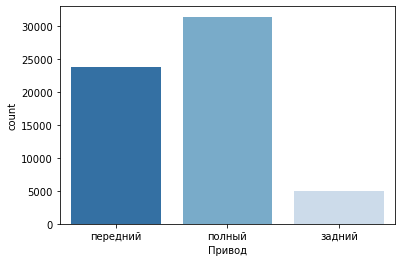

In [135]:
sns.countplot(x = "–ü—Ä–∏–≤–æ–¥", data = train, palette = "Blues_r")

**price**

<AxesSubplot:>

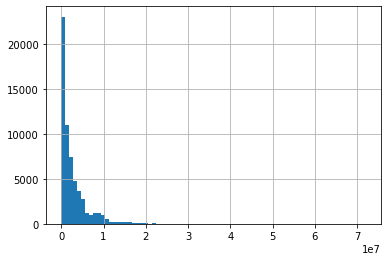

In [136]:
traincc['price'].hist(bins=77)

<AxesSubplot:>

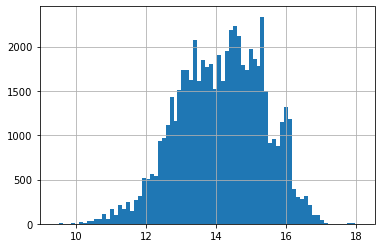

In [137]:
traincc['log_price'].hist(bins=77)

Drop columns

In [138]:
asdasdas

NameError: name 'asdasdas' is not defined

In [142]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  34686 non-null  object  
 1   brand                     34686 non-null  object  
 2   car_url                   34686 non-null  object  
 3   color                     34686 non-null  object  
 4   complectation_dict        6418 non-null   object  
 5   description               34686 non-null  object  
 6   engineDisplacement        34686 non-null  object  
 7   enginePower               34686 non-null  float64 
 8   equipment_dict            24690 non-null  object  
 9   fuelType                  34686 non-null  object  
 10  image                     34686 non-null  object  
 11  mileage                   34686 non-null  int64   
 12  modelDate                 34686 non-null  int64   
 13  model_info                34686 non-null  obje

In [139]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π AT, AMT, MT, CVT –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name
traincc['name_AMT_CVT'] = "-"
for i  in [' AT ', ' MT ', ' AMT ', ' CVT ']: 
    i_ = i.replace(" ","") 
    traincc['name_AMT_CVT'] = traincc.apply(lambda x: i_ if i in x['name'] else x['name_AMT_CVT'], axis = 1)

In [140]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π AT, AMT, MT, CVT –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name
testcc['name_AMT_CVT'] = "-"
for i  in [' AT ', ' MT ', ' AMT ', ' CVT ']: 
    i_ = i.replace(" ","") 
    testcc['name_AMT_CVT'] = testcc.apply(lambda x: i_ if i in x['name'] else x['name_AMT_CVT'], axis = 1)

In [143]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name
traincc['name_4WD'] = traincc['name'].str.contains('4WD').astype('float64')*2 - 1
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name
testcc['name_4WD'] = testcc['name'].str.contains('4WD').astype('float64')*2 - 1

In [144]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π 4WD –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name
def AMT_CVT_find(x):
    for i  in [' AT ', ' MT ', ' AMT ', ' CVT ']: 
        if i in x:
            x = x.replace('hyb',"")
            a = x.find(i)
            if len(x[:a])<4:
                b = x[:a]
            else:
                b = x[a-4:a]
            if b.endswith('d'):
                b = b[:-1]
            b = b.replace(" ","")
            if b == 'ctro':
                b = '2.0'
    return b

traincc['vol_engine'] = traincc['name'].apply(AMT_CVT_find)
traincc = traincc.replace({'vol_engine': r'peS'}, {'vol_engine': '0.0'}, regex=True)
traincc['vol_engine'] = traincc['vol_engine'].astype('float64')

testcc['vol_engine'] = testcc['name'].apply(AMT_CVT_find)
testcc = testcc.replace({'vol_engine': r'peS'}, {'vol_engine': '0.0'}, regex=True)
testcc['vol_engine'] = testcc['vol_engine'].astype('float64')

In [145]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π –º–æ—â–Ω–æ—Å—Ç—å –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name 
coeff_power_to_hourse = 1.35962
traincc['HPower'] = traincc['name'].apply(lambda x: x[x.find('(')+1: x.find('–ª.—Å.')-1] 
                                    if x.find('–ª.—Å.') != -1 else x[x.find('(')+1: x.find('–∫–í—Ç')-1])
traincc['HPower'] = traincc['HPower'].astype('float64')
traincc['HPower'] = traincc.apply(lambda x: int(coeff_power_to_hourse*x['HPower']) 
                            if '–∫–í—Ç' in x['name'] else x['HPower'], axis = 1)
traincc['HPower'] = traincc['HPower'].apply(lambda x: np.log(x+1))


In [146]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã–¥–µ–ª—è—é—â–∏–π –º–æ—â–Ω–æ—Å—Ç—å –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ name 
coeff_power_to_hourse = 1.35962
testcc['HPower'] = testcc['name'].apply(lambda x: x[x.find('(')+1: x.find('–ª.—Å.')-1] 
                                    if x.find('–ª.—Å.') != -1 else x[x.find('(')+1: x.find('–∫–í—Ç')-1])
testcc['HPower'] = testcc['HPower'].astype('float64')
testcc['HPower'] = testcc.apply(lambda x: int(coeff_power_to_hourse*x['HPower']) 
                            if '–∫–í—Ç' in x['name'] else x['HPower'], axis = 1)
testcc['HPower'] = testcc['HPower'].apply(lambda x: np.log(x+1))

In [147]:
traincc1 = traincc

In [148]:
testcc1 = testcc

In [149]:
traincc1['numberOfDoors'] = traincc1['numberOfDoors'].astype('float64')
traincc1['numberOfDoors'] = traincc1['numberOfDoors'].apply(lambda x: 5 if x == 0 else x)

In [150]:
testcc.numberOfDoors.value_counts()

5    18703
4    14126
2     1206
3      650
0        1
Name: numberOfDoors, dtype: int64

In [151]:
testcc1['numberOfDoors'] = testcc1['numberOfDoors'].astype('float64')
testcc1['numberOfDoors'] = testcc1['numberOfDoors'].apply(lambda x: 5 if x == 0 else x)

In [152]:
# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Ä–∞–∑–Ω–∏—Ü—ã –¥–∞—Ç
traincc1['modelDate'] = traincc1['modelDate'].max() - traincc1['modelDate']
traincc1['productionDate'] = traincc1['productionDate'].max() - traincc1['productionDate']
traincc1['DeltaDate'] = traincc1['modelDate'] - traincc1['productionDate']   

traincc1['modelDate'] = traincc1['modelDate'].apply(lambda x: np.log(x+1))
traincc1['productionDate'] = traincc1['productionDate'].apply(lambda x: np.log(x+1))

In [153]:
traincc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   description               60141 non-null  object  
 3   engineDisplacement        60141 non-null  float64 
 4   enginePower               60141 non-null  float64 
 5   equipment_dict            50683 non-null  object  
 6   fuelType                  60141 non-null  object  
 7   image                     60141 non-null  object  
 8   mileage                   60141 non-null  int64   
 9   modelDate                 60141 non-null  float64 
 10  model_info                60141 non-null  object  
 11  model_name                60141 non-null  object  
 12  name                      60141 non-null  object  
 13  numberOfDoors             60141 non-null  floa

In [154]:
testcc1['–í–ª–∞–¥–µ–ª—å—Ü—ã'].value_counts()

3    15957
1     9459
2     9270
Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: int64

In [155]:
# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫v–∞ —Ä–∞–∑–Ω–∏—Ü—ã –¥–∞—Ç
testcc1['modelDate'] = testcc1['modelDate'].max() - testcc1['modelDate']
testcc1['productionDate'] = testcc1['productionDate'].max() - testcc1['productionDate']
testcc1['DeltaDate'] = testcc1['modelDate'] - testcc1['productionDate']   

testcc1['modelDate'] = testcc1['modelDate'].apply(lambda x: np.log(x+1))
testcc1['productionDate'] = testcc1['productionDate'].apply(lambda x: np.log(x+1))

In [156]:
testn=testcc
trainn=traincc

In [157]:
traincc1=traincc
testcc1=testcc

In [158]:
columns_drop1 = ['model_info', 'name', 'car_url', 'sell_id', 'complectation_dict', 'equipment_dict',
                'vehicleConfiguration','–í–ª–∞–¥–µ–Ω–∏–µ', 'image', 'parsing_unixtime', 'super_gen',
                'description',  'log_power']
columns_drop2 = ['model_info', 'name', 'sell_id', 'complectation_dict', 'equipment_dict',
                'vehicleConfiguration','–í–ª–∞–¥–µ–Ω–∏–µ', 'image', 'super_gen','description',  'log_power',
                 'mileageNAN','hidden', 'price_EUR', 'price_USD','–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è','model','start_date']

In [159]:
traincc

bodyType       brand  \
0      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.        AUDI   
1      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.        AUDI   
2      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.        AUDI   
3      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.        AUDI   
4      —Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.        AUDI   
...              ...         ...   
60137          —Å–µ–¥–∞–Ω  VOLKSWAGEN   
60138          —Å–µ–¥–∞–Ω  VOLKSWAGEN   
60139          —Å–µ–¥–∞–Ω  VOLKSWAGEN   
60140          —Å–µ–¥–∞–Ω  VOLKSWAGEN   
60141          —Å–µ–¥–∞–Ω  VOLKSWAGEN   

                                             description  engineDisplacement  \
0      - –ö—Å–µ–Ω–æ–Ω\r\n- –î–∞—Ç—á–∏–∫–∏ —Å–≤–µ—Ç–∞, –¥–æ–∂–¥—è\r\n- 1—Ö –∑–æ–Ω...              1395.0   
1      –ê–≤—Ç–æ–º–æ–±–∏–ª—å –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏, –µ–∑–¥–∏–ª–∞ –¥–µ–≤—É—à–∫...              1390.0   
2      –í–Ω–∏–º–∞–Ω–∏–µ! –¢–æ–ª—å–∫–æ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ AVILON –ê–≤—Ç–æ–º–æ–±–∏–ª...              1390.0   
3      –ö–æ–º–ø–ª–µ–∫—Ç –Ω–æ–≤—ã—Ö –∑–∏–º–Ω–∏—Ö —à–∏–Ω –Ω–∞ –¥–∏—Å–∫–∞—Ö –≤ –ø–æ–¥–∞—Ä–æ–∫....              1390.0   
4      –í—Å–µ –ø–æ —Ä–µ–≥–ª–∞–º–µ–Ω—Ç—É –º–Ω–æ–≥–æ —á—Ç–æ –¥–µ–ª–∞–ª–æ—Å—å –ø–æ –º–∞—à–∏–Ω–µ...              1390.0   
...                                                  ...                 ...   
60137  –ú–∞—à–∏–Ω–∞ –≤ —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –¥–ª—è —Å–≤–æ–∏—Ö –ª–µ—Ç,–ø—Ä–∏ –æ...              1984.0   
60138  –ü–æ–ª–Ω–æ—Å—Ç—å—é –æ–±—Å–ª—É–∂–µ–Ω–∞,–≤—Å–µ –¥–Ω–æ –ø–µ—Ä–µ–≤–∞—Ä–∏–ª–∏ –≤ –∏—é–ª–µ,...              1984.0   
60139  –ü–æ–∫—É–ø–∞–ª–∞—Å—å –≤—Ä–µ–º–µ–Ω–Ω–æ –¥–æ –ø–æ–∫—É–ø–∫–∏ –Ω–æ–≤–æ–≥–æ –ê–≤—Ç–æ. –°—Ç...              1781.0   
60140   –í —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏, —Å–µ–ª –∏ –ø–æ–µ—Ö–∞–ª.  –ú–∞—Å–ª–æ –º–µ–Ω...              1781.0   
60141                                                 []              1595.0   

       enginePower                                     equipment_dict  \
0            125.0  {'electro-window-back': True, 'alloy-wheel-dis...   
1            122.0                                                NaN   
2            122.0  {'asr': True, 'airbag-driver': True, 'aux': Tr...   
3            122.0  {'alloy-wheel-disks': True, 'abs': True, 'esp'...   
4            122.0  {'engine-proof': True, 'esp': True, 'airbag-dr...   
...            ...                                                ...   
60137        115.0                                                NaN   
60138        115.0  {'passenger-seat-updown': True, 'airbag-passen...   
60139         90.0                                                NaN   
60140         90.0  {'engine-proof': True, 'ptf': True, 'airbag-dr...   
60141         75.0  {'alloy-wheel-disks': True, 'tinted-glass': Tr...   

      fuelType                                              image  mileage  \
0       –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/438758...    56627   
1       –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/158389...    39500   
2       –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/204964...    73528   
3       –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/209532...    95400   
4       –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/218118...   149000   
...        ...                                                ...      ...   
60137   –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/219862...   260000   
60138   –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/218118...   250000   
60139   –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/220317...   180580   
60140   –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/215936...   177000   
60141   –±–µ–Ω–∑–∏–Ω  //avatars.mds.yandex.net/get-autoru-vos/217450...   320000   

       modelDate  ... log_power Nalog_base   Nalog  years_old  age_intervals  \
0       1.945910  ...  4.828314         25  3125.0          6              7   
1       2.397895  ...  4.804021         25  3050.0          7              7   
2       2.397895  ...  4.804021         25  3050.0          7              7   
3       2.397895  ...  4.

In [160]:
testcc.drop(columns_drop1, axis=1, inplace=True,errors= 'ignore')
traincc.drop(columns_drop2, axis=1, inplace=True,errors= 'ignore')

In [161]:
traincc['model_name'] = traincc['model_name'].fillna(traincc['model_name'].describe().top)
traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'] = traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].fillna(traincc['–í–ª–∞–¥–µ–ª—å—Ü—ã'].describe().top)

In [162]:
traincc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   engineDisplacement        60141 non-null  float64 
 3   enginePower               60141 non-null  float64 
 4   fuelType                  60141 non-null  object  
 5   mileage                   60141 non-null  int64   
 6   modelDate                 60141 non-null  float64 
 7   model_name                60141 non-null  object  
 8   numberOfDoors             60141 non-null  float64 
 9   parsing_unixtime          60141 non-null  float64 
 10  productionDate            60141 non-null  float64 
 11  section                   60141 non-null  object  
 12  url_saleid                60141 non-null  object  
 13  vehicleTransmission       60141 non-null  obje

In [163]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  34686 non-null  object  
 1   brand                     34686 non-null  object  
 2   color                     34686 non-null  object  
 3   engineDisplacement        34686 non-null  object  
 4   enginePower               34686 non-null  float64 
 5   fuelType                  34686 non-null  object  
 6   mileage                   34686 non-null  int64   
 7   modelDate                 34686 non-null  float64 
 8   model_name                34686 non-null  object  
 9   numberOfDoors             34686 non-null  float64 
 10  productionDate            34686 non-null  float64 
 11  vehicleTransmission       34686 non-null  object  
 12  vendor                    34686 non-null  object  
 13  –í–ª–∞–¥–µ–ª—å—Ü—ã                 34686 non-n

In [164]:
num_cols = ['engineDisplacement', 'enginePower', 'mileage', 'bT_length', 'Nalog_base',
       'brand_length', 'Nalog', 'years_old', 'log_price']

In [ ]:
correlation = traincc[num_cols].corr()
correlation

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [165]:
columns_d = ['brand_length','description_word']
traincc.drop(columns_d, axis=1, inplace=True)
testcc.drop(columns_d, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

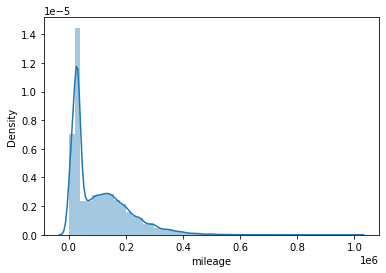

In [166]:
sns.distplot(traincc['mileage'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

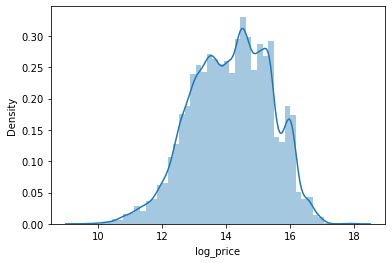

In [167]:
sns.distplot(traincc['log_price'])

In [168]:
asd

NameError: name 'asd' is not defined

In [169]:
traincc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   engineDisplacement        60141 non-null  float64 
 3   enginePower               60141 non-null  float64 
 4   fuelType                  60141 non-null  object  
 5   mileage                   60141 non-null  int64   
 6   modelDate                 60141 non-null  float64 
 7   model_name                60141 non-null  object  
 8   numberOfDoors             60141 non-null  float64 
 9   parsing_unixtime          60141 non-null  float64 
 10  productionDate            60141 non-null  float64 
 11  section                   60141 non-null  object  
 12  url_saleid                60141 non-null  object  
 13  vehicleTransmission       60141 non-null  obje

In [170]:
columns_drop = ['engineDisplacement']
traincc = traincc.drop(columns_drop, axis=1)

In [171]:
columns_drop = ['engineDisplacement']
testcc = testcc.drop(columns_drop, axis=1)

**Concatenation train and test **

In [172]:
columns = list(testcc.columns) 

In [173]:
columns.remove('Nalog_base')

In [174]:
len(columns)

48

In [175]:
df_train = traincc[columns]
df_test = testcc[columns]

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 0 to 60141
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  60141 non-null  object  
 1   brand                     60141 non-null  object  
 2   color                     60141 non-null  object  
 3   enginePower               60141 non-null  float64 
 4   fuelType                  60141 non-null  object  
 5   mileage                   60141 non-null  int64   
 6   modelDate                 60141 non-null  float64 
 7   model_name                60141 non-null  object  
 8   numberOfDoors             60141 non-null  float64 
 9   productionDate            60141 non-null  float64 
 10  vehicleTransmission       60141 non-null  object  
 11  vendor                    60141 non-null  object  
 12  –í–ª–∞–¥–µ–ª—å—Ü—ã                 60141 non-null  category
 13  –ü–¢–°                       60141 no

In [177]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bodyType                  34686 non-null  object  
 1   brand                     34686 non-null  object  
 2   color                     34686 non-null  object  
 3   enginePower               34686 non-null  float64 
 4   fuelType                  34686 non-null  object  
 5   mileage                   34686 non-null  int64   
 6   modelDate                 34686 non-null  float64 
 7   model_name                34686 non-null  object  
 8   numberOfDoors             34686 non-null  float64 
 9   productionDate            34686 non-null  float64 
 10  vehicleTransmission       34686 non-null  object  
 11  vendor                    34686 non-null  object  
 12  –í–ª–∞–¥–µ–ª—å—Ü—ã                 34686 non-null  category
 13  –ü–¢–°                       34686 no

In [178]:
y = traincc['price']

In [179]:
# y.to_csv('yy2201.csv', encoding = 'utf-8')

In [180]:
y

0        956000
1        745000
2        825000
3        880000
4        550000
          ...  
60137     40000
60138    100000
60139     65000
60140    110000
60141    100000
Name: price, Length: 60141, dtype: int64

In [181]:
df_test

bodyType  brand       color  enginePower fuelType  mileage  \
0                –ª–∏—Ñ—Ç–±–µ–∫  SKODA       —Å–∏–Ω–∏–π        105.0   –±–µ–Ω–∑–∏–Ω    74000   
1                –ª–∏—Ñ—Ç–±–µ–∫  SKODA      —á—ë—Ä–Ω—ã–π        110.0   –±–µ–Ω–∑–∏–Ω    60563   
2                –ª–∏—Ñ—Ç–±–µ–∫  SKODA       —Å–µ—Ä—ã–π        152.0   –±–µ–Ω–∑–∏–Ω    88000   
3                –ª–∏—Ñ—Ç–±–µ–∫  SKODA  –∫–æ—Ä–∏—á–Ω–µ–≤—ã–π        110.0   –±–µ–Ω–∑–∏–Ω    95000   
4                –ª–∏—Ñ—Ç–±–µ–∫  SKODA       –±–µ–ª—ã–π        152.0   –±–µ–Ω–∑–∏–Ω    58536   
...                  ...    ...         ...          ...      ...      ...   
34681              —Å–µ–¥–∞–Ω    BMW  –∫–æ—Ä–∏—á–Ω–µ–≤—ã–π        136.0   –±–µ–Ω–∑–∏–Ω   115000   
34682              —Å–µ–¥–∞–Ω    BMW      —á—ë—Ä–Ω—ã–π        190.0   –¥–∏–∑–µ–ª—å    98000   
34683              —Å–µ–¥–∞–Ω    BMW       —Å–µ—Ä—ã–π        170.0   –±–µ–Ω–∑–∏–Ω   360000   
34684  –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.    BMW  –∫–æ—Ä–∏—á–Ω–µ–≤—ã–π        184.0   –¥–∏–∑–µ–ª—å    90500   
34685  –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.    BMW      —á—ë—Ä–Ω—ã–π        235.0   –¥–∏–∑–µ–ª—å   240000   

       modelDate model_name  numberOfDoors  productionDate  ...  \
0       2.079442    OCTAVIA            5.0        1.945910  ...   
1       1.386294    OCTAVIA            5.0        1.386294  ...   
2       2.079442     SUPERB            5.0        1.945910  ...   
3       2.079442    OCTAVIA            5.0        1.945910  ...   
4       2.564949    OCTAVIA            5.0        2.197225  ...   
...          ...        ...            ...             ...  ...   
34681   2.302585        3ER            4.0        1.945910  ...   
34682   1.609438        5ER            4.0        1.098612  ...   
34683   3.258097        5ER            4.0        3.178054  ...   
34684   2.197225         X1            5.0        2.079442  ...   
34685   2.708050         X5            5.0        2.564949  ...   

      roof_with_panoramic_view bT_length    Nalog years_old age_intervals  \
0                            0         7   2625.0         7             7   
1                            0         7   2750.0         4             7   
2                            0         7   6840.0         7             7   
3                            0         7   2750.0         7             7   
4                            0         7   6840.0         9            14   
...                        ...       ...      ...       ...           ...   
34681                        0         5   4760.0         7             7   
34682                        0         5   9500.0         3             3   
34683                        0         5   7650.0        24            35   
34684                        0        17   9200.0         8            14   
34685                        0        17  17625.0        13            14   

      name_AMT_CVT  name_4WD  vol_engine    HPower  DeltaDate  
0              AMT      -1.0         1.2  4.663439          1  
1               MT      -1.0         1.6  4.709530          0  
2              AMT      -1.0         1.8  5.030438          1  
3               AT      -1.0         1.6  4.709530          1  
4               AT      -1.0         1.8  5.030438          4  
...            ...       ...         ...       ...        ...  
34681           AT      -1.0         1.6  4.919981          3  
34682           AT       1.0         2.0  5.252273          2  
34683           AT      -1.0         2.5  5.141664          2  
34684           AT       1.0         2.0  5.220356          1  
34685           AT       1.0         3.0  5.463832          2  

[34686 rows x 48 columns]

# Label Encoding

In [182]:
df_test['sample'] = 0 # —Ç–µ—Å—Ç

In [183]:
df_train['sample'] = 1 # —Ç—Ä–µ–π–Ω


<ipython-input-183-5915a13b6c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sample'] = 1 # —Ç—Ä–µ–π–Ω


In [184]:
# columns_drop = ['engineDisplacement']
# data = train.drop(columns_drop, axis=1)

In [185]:
data = df_test.append(df_train, sort=False).reset_index(drop=True) 

In [186]:
data.isna().sum()

bodyType                    0
brand                       0
color                       0
enginePower                 0
fuelType                    0
mileage                     0
modelDate                   0
model_name                  0
numberOfDoors               0
productionDate              0
vehicleTransmission         0
vendor                      0
–í–ª–∞–¥–µ–ª—å—Ü—ã                   0
–ü–¢–°                         0
–ü—Ä–∏–≤–æ–¥                      0
–†—É–ª—å                        0
leather                     0
carter                      0
ABS                         0
airbags                     0
immob                       0
central_locking             0
on_board_computer           0
cruise_control              0
climat_control              0
multi_rudder                0
power_steering              0
light_and_rain_sensors      0
—Åarbon_body_kits            0
rear_diffuser_rkp           0
door_closers                0
rear_view_camera            0
amg              

In [200]:
for column in ['bodyType', 'brand', 'color', 'fuelType', 'model_name', 'vendor', '–í–ª–∞–¥–µ–ª—å—Ü—ã', 'vehicleTransmission', '–ü—Ä–∏–≤–æ–¥', 'age_intervals','name_AMT_CVT']:
    data[column] = data[column].astype('category').cat.codes

In [201]:
bin_cols = ['–ü–¢–°', '–†—É–ª—å']
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

bodyType  brand  color  enginePower  fuelType  mileage  modelDate  \
0         8      8     14        105.0         0    74000   2.079442   
1         8      8     17        110.0         0    60563   1.386294   
2         8      8     13        152.0         0    88000   2.079442   
3         8      8      7        110.0         0    95000   2.079442   
4         8      8      2        152.0         0    58536   2.564949   

   model_name  numberOfDoors  productionDate  ...  bT_length   Nalog  \
0         505            5.0        1.945910  ...          7  2625.0   
1         505            5.0        1.386294  ...          7  2750.0   
2         684            5.0        1.945910  ...          7  6840.0   
3         505            5.0        1.945910  ...          7  2750.0   
4         505            5.0        2.197225  ...          7  6840.0   

   years_old  age_intervals  name_AMT_CVT  name_4WD  vol_engine    HPower  \
0          7              1             0      -1.0         1.2  4.663439   
1          4              1             3      -1.0         1.6  4.709530   
2          7              1             0      -1.0         1.8  5.030438   
3          7              1             1      -1.0         1.6  4.709530   
4          9              2             1      -1.0         1.8  5.030438   

   DeltaDate  sample  
0          1       0  
1          0       0  
2          1       0  
3          1       0  
4          4       0  

[5 rows x 49 columns]

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94827 entries, 0 to 94826
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  94827 non-null  int8   
 1   brand                     94827 non-null  int8   
 2   color                     94827 non-null  int8   
 3   enginePower               94827 non-null  float64
 4   fuelType                  94827 non-null  int8   
 5   mileage                   94827 non-null  int64  
 6   modelDate                 94827 non-null  float64
 7   model_name                94827 non-null  int16  
 8   numberOfDoors             94827 non-null  float64
 9   productionDate            94827 non-null  float64
 10  vehicleTransmission       94827 non-null  int8   
 11  vendor                    94827 non-null  int8   
 12  –í–ª–∞–¥–µ–ª—å—Ü—ã                 94827 non-null  int8   
 13  –ü–¢–°                       94827 non-null  int64  

In [ ]:
# columns_drop = ['engineDisplacement']
# data = train.drop(columns_drop, axis=1)

In [ ]:
# data['engineDisplacement'] = data['engineDisplacement'].astype('float')

In [190]:
data.to_csv('data2201.csv')

In [203]:
X = data.query('sample == 1').drop(['sample'], axis=1)
X_sub = data.query('sample == 0').drop(['sample'], axis=1)

In [204]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60141 entries, 34686 to 94826
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  60141 non-null  int8   
 1   brand                     60141 non-null  int8   
 2   color                     60141 non-null  int8   
 3   enginePower               60141 non-null  float64
 4   fuelType                  60141 non-null  int8   
 5   mileage                   60141 non-null  int64  
 6   modelDate                 60141 non-null  float64
 7   model_name                60141 non-null  int16  
 8   numberOfDoors             60141 non-null  float64
 9   productionDate            60141 non-null  float64
 10  vehicleTransmission       60141 non-null  int8   
 11  vendor                    60141 non-null  int8   
 12  –í–ª–∞–¥–µ–ª—å—Ü—ã                 60141 non-null  int8   
 13  –ü–¢–°                       60141 non-null  int

In [205]:
X_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  34686 non-null  int8   
 1   brand                     34686 non-null  int8   
 2   color                     34686 non-null  int8   
 3   enginePower               34686 non-null  float64
 4   fuelType                  34686 non-null  int8   
 5   mileage                   34686 non-null  int64  
 6   modelDate                 34686 non-null  float64
 7   model_name                34686 non-null  int16  
 8   numberOfDoors             34686 non-null  float64
 9   productionDate            34686 non-null  float64
 10  vehicleTransmission       34686 non-null  int8   
 11  vendor                    34686 non-null  int8   
 12  –í–ª–∞–¥–µ–ª—å—Ü—ã                 34686 non-null  int8   
 13  –ü–¢–°                       34686 non-null  int64  

**Function to determine value of mape**

In [206]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

# Train test split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [208]:
np.log(y_train)

17306    12.100712
57040    12.923912
44103    13.457406
56771    12.921470
32103    16.837729
           ...    
54344    13.905351
38159    14.428532
860      14.547878
15795    14.206877
56423    14.677556
Name: price, Length: 48112, dtype: float64

# XGBOOST

In [209]:
import xgboost as xgb

In [210]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate= 0.01 ,max_depth=24, alpha=1,
                          n_estimators=5000,tree_method='auto')


In [211]:
xg_reg.fit(X_train, np.log(y_train))

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=24,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='auto', validate_parameters=1, verbosity=None)

In [212]:
predict_test = np.exp(xg_reg.predict(X_test)) 
predict_submission = np.exp(xg_reg.predict(X_sub))


In [213]:
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mape(y_test, predict_test))*100:0.2f}%")
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_xg22.csv', index=False)


–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 10.63%


In [ ]:
test.info()

–†–µ–∑—É–ª—å—Ç–∞—Ç XGBoost = 8.04237

# GradientBoosting

In [ ]:
gb = GradientBoostingRegressor(min_samples_split=2, learning_rate=0.01, max_depth=24, n_estimators=5000)
gb.fit(X_train, np.log(y_train))

In [ ]:
predict_test = np.exp(gb.predict(X_test))
predict_submission = np.exp(gb.predict(X_sub))

In [ ]:
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_2201gb.csv', index=False)


In [ ]:
etr = ExtraTreesRegressor(n_estimators=500, random_state=42)
etr.fit(X_train, np.log(y_train))
predict_test = np.exp(etr.predict(X_test))
predict_submission = np.exp(etr.predict(X_sub))
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
def prepare_stop_words():
    stop_slovo_sep = ", . ' : ; ! ? ‚Ññ % * ( ) [ ] { | } # $ ^ & - + < = > ` ~ 1 2 3 4 5 6 7 8 9 0 | @ ¬∑ \' - `"
    stop_slovo_sep += "¬∑ ‚Ä¢ ‚Äî ‚ùóÔ∏è ‚ú™ \\ / üòÅ üòä üòâ ‚àô ‚úî ‚ñ∫ ‚ÇΩ ‚Ä≥ ¬´ ¬ª ‚Ä¶ ‚úÖ ‚òëÔ∏è ü§¶ ‚óè üî∞ ¬∞ üìå üì¢ ‚òé ‚ñº ‚û• ‚òõ „ÄÇ üîù ‚¨áÔ∏è ‚ñ∂"
    stop_slovo_sep = stop_slovo_sep.split(" ")
 
    stop_slovo = "–∏ –≤ –≤–æ –Ω–µ —á—Ç–æ –æ–Ω –Ω–∞ —è —Å —Å–æ –∫–∞–∫ –∞ —Ç–æ –≤—Å–µ –æ–Ω–∞ —Ç–∞–∫ –µ–≥–æ –Ω–æ –¥–∞ —Ç—ã –∫ —É –∂–µ –≤—ã –∑–∞ –±—ã –ø–æ —Ç–æ–ª—å–∫–æ –µ–µ –º–Ω–µ –±—ã–ª–æ –≤–æ—Ç –æ—Ç"
    stop_slovo += "–º–µ–Ω—è –µ—â–µ –Ω–µ—Ç –æ –∏–∑ –µ–º—É —Ç–µ–ø–µ—Ä—å –∫–æ–≥–¥–∞ –¥–∞–∂–µ –Ω—É –≤–¥—Ä—É–≥ –ª–∏ –µ—Å–ª–∏ —É–∂–µ –∏–ª–∏ –Ω–∏ –±—ã—Ç—å –±—ã–ª –Ω–µ–≥–æ –¥–æ –≤–∞—Å –Ω–∏–±—É–¥—å –æ–ø—è—Ç—å —É–∂"
    stop_slovo += "–≤–∞–º –≤–µ–¥—å —Ç–∞–º –ø–æ—Ç–æ–º —Å–µ–±—è –Ω–∏—á–µ–≥–æ –µ–π –º–æ–∂–µ—Ç –æ–Ω–∏ —Ç—É—Ç –≥–¥–µ –µ—Å—Ç—å –Ω–∞–¥–æ –Ω–µ–π –¥–ª—è –º—ã —Ç–µ–±—è –∏—Ö —á–µ–º –±—ã–ª–∞ —Å–∞–º —á—Ç–æ–± –±–µ–∑"
    stop_slovo += "–±—É–¥—Ç–æ —á–µ–≥–æ —Ä–∞–∑ —Ç–æ–∂–µ —Å–µ–±–µ –ø–æ–¥ –±—É–¥–µ—Ç –∂ —Ç–æ–≥–¥–∞ –∫—Ç–æ —ç—Ç–æ—Ç —Ç–æ–≥–æ –ø–æ—Ç–æ–º—É —ç—Ç–æ–≥–æ –∫–∞–∫–æ–π —Å–æ–≤—Å–µ–º –Ω–∏–º –∑–¥–µ—Å—å —ç—Ç–æ–º –æ–¥–∏–Ω"
    stop_slovo += "–ø–æ—á—Ç–∏ –º–æ–π —Ç–µ–º —á—Ç–æ–±—ã –Ω–µ–µ —Å–µ–π—á–∞—Å –±—ã–ª–∏ –∫—É–¥–∞ –∑–∞—á–µ–º –≤—Å–µ—Ö –Ω–∏–∫–æ–≥–¥–∞ –º–æ–∂–Ω–æ –ø—Ä–∏ –Ω–∞–∫–æ–Ω–µ—Ü –¥–≤–∞ –æ–± –¥—Ä—É–≥–æ–π —Ö–æ—Ç—å –ø–æ—Å–ª–µ"
    stop_slovo += "–Ω–∞–¥ –±–æ–ª—å—à–µ —Ç–æ—Ç —á–µ—Ä–µ–∑ —ç—Ç–∏ –Ω–∞—Å –ø—Ä–æ –≤—Å–µ–≥–æ –Ω–∏—Ö –∫–∞–∫–∞—è –º–Ω–æ–≥–æ —Ä–∞–∑–≤–µ —Ç—Ä–∏ —ç—Ç—É –º–æ—è –≤–ø—Ä–æ—á–µ–º —Ö–æ—Ä–æ—à–æ —Å–≤–æ—é —ç—Ç–æ–π –ø–µ—Ä–µ–¥"
    stop_slovo += "–∏–Ω–æ–≥–¥–∞ –ª—É—á—à–µ —á—É—Ç—å —Ç–æ–º –Ω–µ–ª—å–∑—è —Ç–∞–∫–æ–π –∏–º –±–æ–ª–µ–µ –≤—Å–µ–≥–¥–∞ –∫–æ–Ω–µ—á–Ω–æ –≤—Å—é –º–µ–∂–¥—É"
    stop_slovo += "–≤ –∏–∑ –∑–∞ —Å –∫ –∞ —Ç–∞–∫ –∂–µ –∫–∞–∫ –¥–æ —Ä—É–± –¥–ª—è –ø–æ —á—Ç–æ –≤–∞—à –≤–∞—Å –≤—ã –∏–∑-–∑–∞ —Ç–æ —Ç–æ–∂–µ –∂–µ —Ç–¥ –∫–º –≥ –≥–æ–¥ –≥–æ–¥–∞ —É –± –±—ã —á—Ç–æ –∞ a a –∞"
    stop_slovo += "–ª –º —Å–æ number url —è –º—ã —Ä —Ä—É–±–ª–µ–π —Ç—Ä –Ω–æ —Ç –¥ —Ä r –π —Å—Ç—Ä —Ç—ã—Å p s —Å v –∞–º i –±—ã t https www ru –∞ cme —Ç–∏ uy m  b –≥–≥"
    stop_slovo = list(set(stop_slovo.split(" ")))
    if "" in stop_slovo:
        stop_slovo.remove("") 
        
    return stop_slovo, stop_slovo_sep
    
    
def text_check(x, stop_slovo, stop_slovo_sep):
    x = x.lower().replace("_"," ").replace(" - "," ").replace('"', ' ').replace(" ‚Äì "," ").replace("‚Äú"," ").replace("‚Äù"," ")
    x = x.replace(" –Ω–µ "," –Ω–µ_").replace(" –±–µ–∑ "," –±–µ–∑_").expandtabs(1).replace("\n"," ")
    
    for i in stop_slovo_sep:
        x = x.replace(i, " ") 
        
    for i in stop_slovo:
        x = x.replace(" " + i + " "," ") 
    
    x = x.replace("trade in","trade_in")
    x = ' '.join(x.split())
    return x

def text_prepare(data, col_name = 'description'):
    data[col_name].fillna("", inplace = True)
    data[col_name]= data[col_name].astype(str)
    stop_slovo, stop_slovo_sep = prepare_stop_words()
    data[col_name] = data[col_name].apply(lambda x: text_check(x, stop_slovo, stop_slovo_sep))
    



In [ ]:
text_prepare(train, col_name = 'description')

In [ ]:
len(texts)

In [ ]:
batch_size = 1000
texts = train['description']
text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]

In [ ]:
def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

In [ ]:
def text_lemmatize(data, col_name = 'description'):
    mystem = Mystem()
    data[col_name] = data[col_name].apply(lambda x: "".join(mystem.lemmatize(x)))
    


In [ ]:
processed_texts text_lemmatize(data, col_name = 'description')

In [ ]:
processed_texts = Parallel(n_jobs=-1)(delayed(text_lemmatize)(train, col_name = 'description'))

In [ ]:
from pymystem3 import Mystem
from tqdm import tqdm

from joblib import Parallel, delayed
batch_size = 1000
texts = train['description']
text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]


In [ ]:
def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

In [ ]:
processed_texts = Parallel(n_jobs=-1)(delayed(lemmatize)(t) for t in tqdm(text_batch))

In [ ]:

def text_lemmatize(data, col_name = 'description'):
    mystem = Mystem()
    data[col_name] = data[col_name].apply(lambda x: "".join(mystem.lemmatize(x)))
text_lemmatize(data, col_name = 'description')    

In [ ]:
from pymystem3 import Mystem
from tqdm import tqdm

from joblib import Parallel, delayed

batch_size = 100
texts = ["–ú–∞–º–∞ –º—ã–ª–∞ —Ä–∞–º—É {}".format(i) for i in range(100)]

text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]

def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

# –í–æ—Ç –∑–¥–µ—Å—å —Ç–æ–∂–µ –Ω–µ–º–Ω–æ–≥–æ –º–∞–≥–∏–∏ :)
processed_texts = Parallel(n_jobs=-1)(delayed(lemmatize)(t) for t in tqdm(text_batch))

Result GradientBoostingRegressor = 10.13381

# StackingRegressor

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

In [215]:
estimators = [
    ('xg_reg', xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate= 0.01 ,max_depth=22, alpha=1,
                          n_estimators=5000,tree_method='auto')),
    ('gb', GradientBoostingRegressor(min_samples_split=2, learning_rate=0.01, max_depth=15,
                                     n_estimators=5000))
]

In [216]:
reg5 = StackingRegressor(estimators=estimators)
reg5.fit(X_train, np.log(y_train))


KeyboardInterrupt: 

In [ ]:
predict_test = np.exp(reg5.predict(X_test))
predict_submission = np.exp(reg5.predict(X_sub))


In [ ]:
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_1029st.csv', index=False)
            